<a href="https://colab.research.google.com/github/sophia-m25/Group25/blob/main/Copy_of_Spain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing the pandas library for data manipulation and analysis.
import pandas as pd

# Importing the numpy library for support of large, multi-dimensional arrays and matrices, along with a large collection of mathematical functions to operate on these arrays.
import numpy as np

# Importing the matplotlib library's pyplot module to provide a MATLAB-like plotting framework.
import matplotlib.pyplot as plt

# Importing the glob module to find all the pathnames matching a specified pattern according to the rules used by the Unix shell.
import glob

# Importing the Workbook class from the openpyxl library to work with Excel 2010 xlsx/xlsm/xltx/xltm files.
from openpyxl import Workbook

# Importing the NamedStyle class from the openpyxl.styles module to define styles that can be applied to cells in Excel sheets.
from openpyxl.styles import NamedStyle


In [ ]:
df1 = pd.read_excel('/content/Spaindata.xlsx')  # Load data for Spain
df2 = pd.read_excel('/content/USdata.xlsx')  # Load data for the US

# Merge the two dataframes based on their indices
merged_df = pd.merge(df1, df2, left_index=True, right_index=True)

# Drop the 6th column (redundant date column from the US dataset)
merged_df.drop(columns=merged_df.columns[5], inplace=True)

# Rename the columns for clarity
new_columns = ["date", "spain_economic_activity", "spain_fx", "spain_reserves", "spain_CPI", "us_economic_activity", "us_exchange_rate", "us_reserves", "us_CPI"]
merged_df.columns = new_columns

# Drop the first row as it seems to be a header
merged_df = merged_df.drop(merged_df.index[0])

# Drop every 12th row starting from the 3rd row (these are yearly averages)
#rows_to_drop = range(1, len(merged_df), 13)
#merged_df = merged_df.drop(merged_df.index[rows_to_drop])

# Reset index to clean up row and column indices
merged_df.reset_index(drop=True, inplace=True)

# Drop the first row again after resetting index
merged_df = merged_df.drop(merged_df.index[0])

# Convert the 'date' column to datetime format
merged_df['date'] = pd.to_datetime(merged_df['date'])

# Display the first five rows of the merged dataframe with styling
display(merged_df.head().style)


In [ ]:
# Convert the 'date' column to datetime format
merged_df['date'] = pd.to_datetime(merged_df['date'])

# Format the 'date' column to display in 'YYYY-MM' format
merged_df['date'] = merged_df['date'].dt.strftime('%Y-%m')

# Display the first ten rows of the merged dataframe with styling
display(merged_df.head(10).style)


In [ ]:
# Convert the index to datetime if it's not already
merged_df.index = pd.to_datetime(merged_df.index)

# Format the index to 'YYYY-MM' if it's a datetime object
merged_df.index = merged_df.index.strftime('%Y-%m')


#i) Calculate Spain's nominal exchange rate growth
merged_df['spain_nominal_exchange_rate_growth'] = merged_df['spain_fx'].pct_change() * 100

#ii) Calculate Spain's real exchange rate index
merged_df['spain_real_exchange_rate_index'] = merged_df['spain_fx'] * merged_df['us_CPI'] / merged_df['spain_fx']
#print(merged_df[['date', 'spain_real_exchange_rate_index']])

#iv) Calculate Spain's and US' monthly inflation rate
merged_df['spain_inflation_rate'] = merged_df['spain_CPI'].pct_change() * 100
merged_df['us_inflation_rate'] = merged_df['us_CPI'].pct_change() * 100

#iii)
# Calculate Spain's real exchange rate growth
# The formula is: real exchange growth = monthly growth of real exchange rate + foreign inflation - domestic inflation
spain_real_exchange_rate_growth1 = merged_df['spain_real_exchange_rate_index'] + merged_df['us_inflation_rate'] - merged_df['spain_inflation_rate']
merged_df['spain_real_exchange_rate_growth1'] = spain_real_exchange_rate_growth1
#display(merged_df[['date', 'spain_real_exchange_rate_growth1']])


#v) Calculate Spain's monthly growth in industrial production
merged_df['spain_industrial_production_growth'] = merged_df['spain_economic_activity'].pct_change() * 100

#v) Calculate Spain's growth in industrial production vs 12 months ago
merged_df['industrial_production_12_months_ago'] = merged_df['spain_economic_activity'].shift(12)
merged_df['spain_industrial_production_growth_vs_12_months_ago'] = ((merged_df['spain_economic_activity'] - merged_df['industrial_production_12_months_ago']) / merged_df['industrial_production_12_months_ago']) * 100
merged_df.drop(columns=['industrial_production_12_months_ago'], inplace=True)

# Convert the index to datetime and ensure it's in 'YYYY-MM' format
merged_df.index = pd.to_datetime(merged_df.index).strftime('%Y-%m')

# Convert the index back to datetime for comparison
# Ensure the index is in datetime format for easy comparison
merged_df.index = pd.to_datetime(merged_df.index)


# Now check for the year 1960 directly on the datetime index
if (merged_df.index.year == 1960).any():
    base_year_us_reserves = merged_df[merged_df.index.year == 1960]['us_reserves'].iloc[0]
    merged_df['us_reserves_index'] = (merged_df['us_reserves'] / base_year_us_reserves) * 100
else:
    print("No data available for US reserves in 1960.")

# Do the same for Spain reserves
if (merged_df.index.year == 1960).any():
    base_year_reserves = merged_df[merged_df.index.year == 1960]['spain_reserves'].iloc[0]
    merged_df['spain_reserves_index'] = (merged_df['spain_reserves'] / base_year_reserves) * 100
else:
    print("No data available for Spain reserves in 1960.")
display(merged_df.head(372))


No data available for US reserves in 1960.
No data available for Spain reserves in 1960.


date spain_economic_activity  spain_fx spain_reserves  \
1970-01-01  1960-01                     NaN  0.016667            233   
1970-01-01  1960-02                     NaN  0.016667            253   
1970-01-01  1960-03                     NaN  0.016667            299   
1970-01-01  1960-04                     NaN  0.016667            326   
1970-01-01  1960-05                     NaN  0.016667            360   
1970-01-01  1960-06                     NaN  0.016667            406   
1970-01-01  1960-07                     NaN  0.016667            427   
1970-01-01  1960-08                     NaN  0.016667            455   
1970-01-01  1960-09                     NaN  0.016667            479   
1970-01-01  1960-10                     NaN  0.016667            527   
1970-01-01  1960-11                     NaN  0.016667            521   
1970-01-01  1960-12                     NaN  0.016667            541   
1970-01-01  1961-01               18.681625  0.016667            536   
1970-01-01  1961-02               18.247714  0.016667            565   
1970-01-01  1961-03               18.423624  0.016667         561.55   
1970-01-01  1961-04               18.611261  0.016667          593.5   
1970-01-01  1961-05               19.584629  0.016667          643.5   
1970-01-01  1961-06               18.447079  0.016667          683.5   
1970-01-01  1961-07               17.614439  0.016667          716.5   
1970-01-01  1961-08               17.684803  0.016667          773.5   
1970-01-01  1961-09               19.643266  0.016667          795.5   
1970-01-01  1961-10               20.206177  0.016667          825.5   
1970-01-01  1961-11               21.836275  0.016667          851.5   
1970-01-01  1961-12               23.442918  0.016667         886.52   
1970-01-01  1962-01               22.082549  0.016667          912.5   
1970-01-01  1962-02               21.003635  0.016667          935.5   
1970-01-01  1962-03               22.387459  0.016667          958.5   
1970-01-01  1962-04               20.581452  0.016667          977.5   
1970-01-01  1962-05               21.355455  0.016667          988.5   
1970-01-01  1962-06               20.827725  0.016667         1004.5   
1970-01-01  1962-07               19.901267  0.016667         1031.5   
1970-01-01  1962-08               18.974808  0.016667         1026.5   
1970-01-01  1962-09                20.19445  0.016667         1047.5   
1970-01-01  1962-10               21.765911  0.016667         1046.5   
1970-01-01  1962-11               23.372555  0.016667         1046.5   
1970-01-01  1962-12               24.205194  0.016667         1045.5   
1970-01-01  1963-01               24.216922  0.016667           1062   
1970-01-01  1963-02                22.86828  0.016667           1062   
1970-01-01  1963-03               23.337373  0.016667           1038   
1970-01-01  1963-04               22.809643  0.016667           1039   
1970-01-01  1963-05                23.65401  0.016667           1035   
1970-01-01  1963-06               22.539915  0.016667           1032   
1970-01-01  1963-07               21.613456  0.016667           1054   
1970-01-01  1963-08               20.898089  0.016667           1106   
1970-01-01  1963-09               22.317095  0.016667           1119   
1970-01-01  1963-10               24.299013  0.016667           1107   
1970-01-01  1963-11               24.627378  0.016667           1106   
1970-01-01  1963-12               25.753201  0.016667           1147   
1970-01-01  1964-01               26.843842  0.016667           1183   
1970-01-01  1964-02               26.656205  0.016667           1187   
1970-01-01  1964-03               24.932288  0.016667         1210.5   
1970-01-01  1964-04                26.15193  0.016667         1214.5   
1970-01-01  1964-05               26.058111  0.016667           1221   
1970-01-01  1964-06               25.999475  0.016667           1265   
1970-01-01  1964-07               25.471745  0.016667  

<ipython-input-46-f983b69fb787>:15: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if merged_df[column].dtype == np.number and column != 'Outlier':


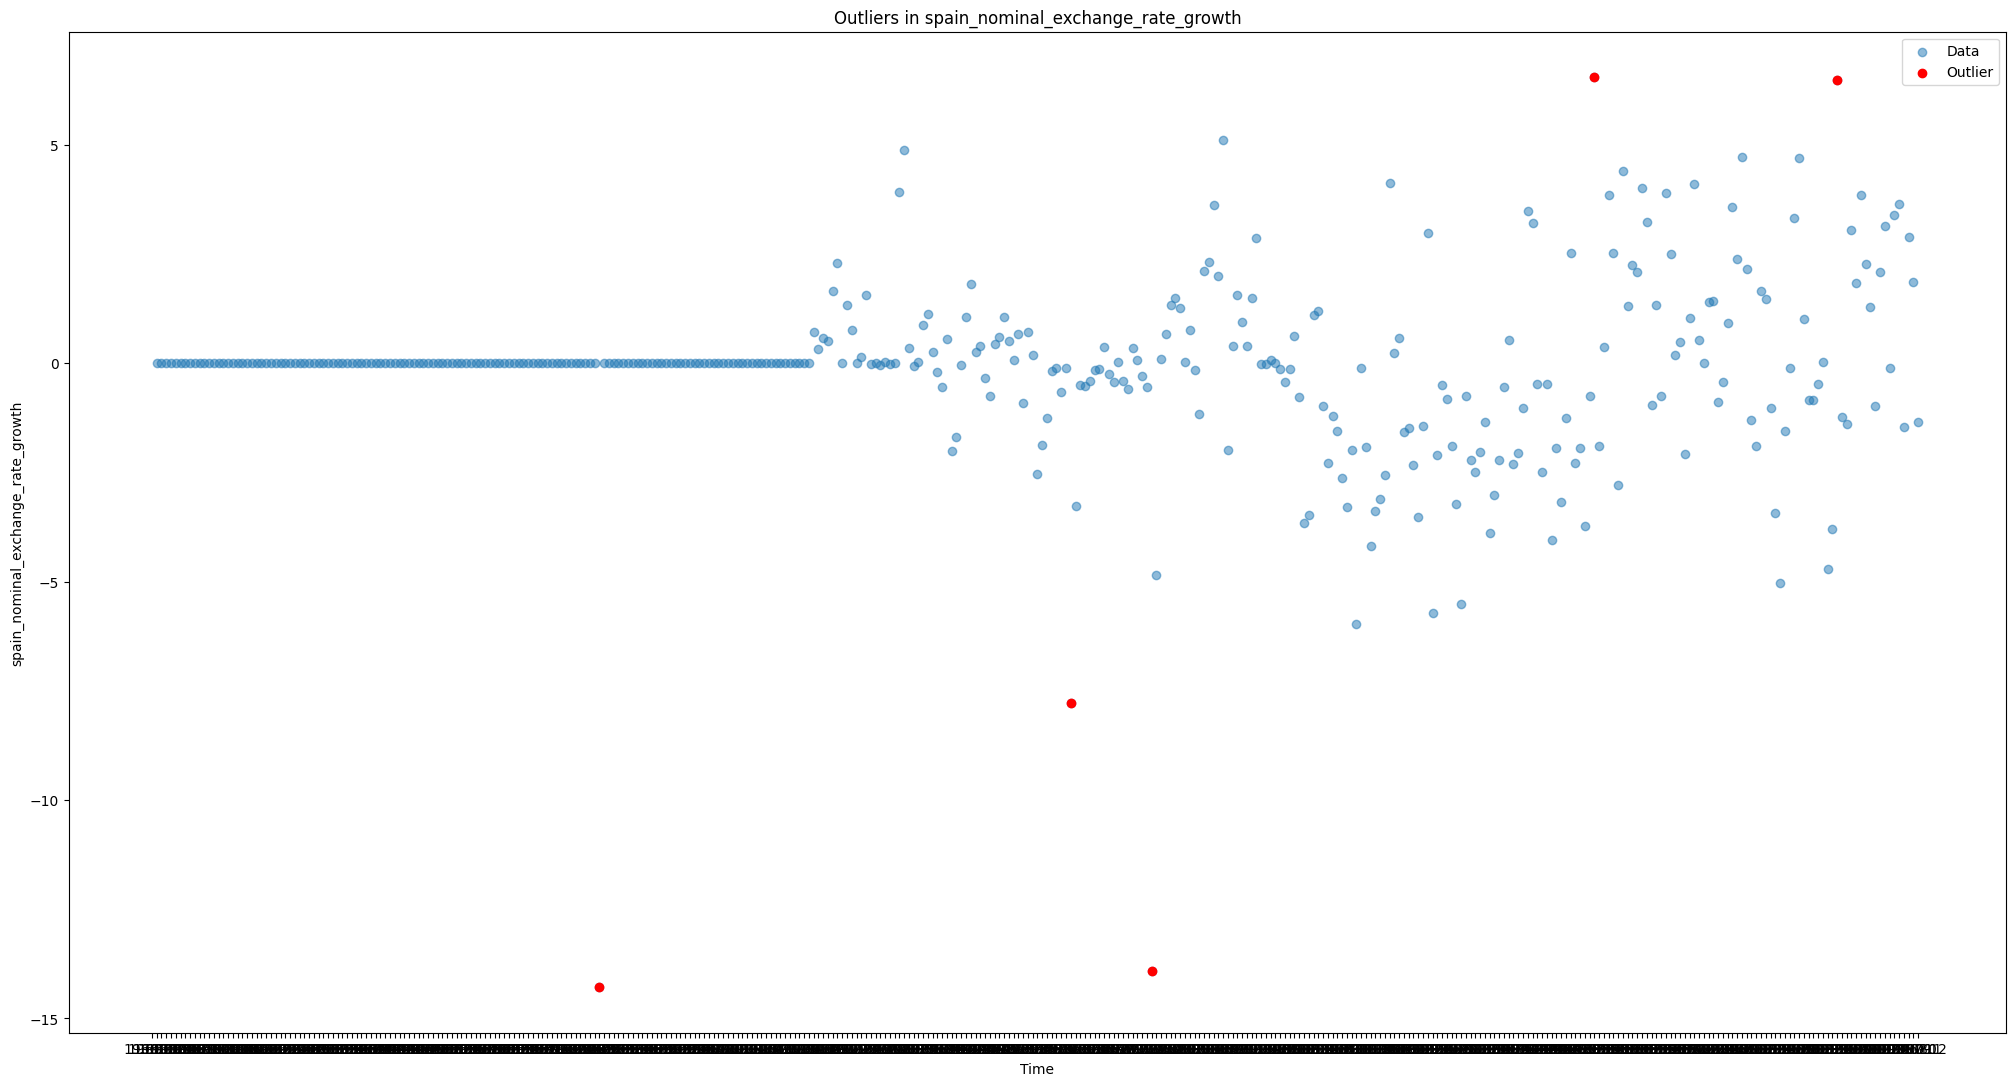

<ipython-input-46-f983b69fb787>:15: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if merged_df[column].dtype == np.number and column != 'Outlier':


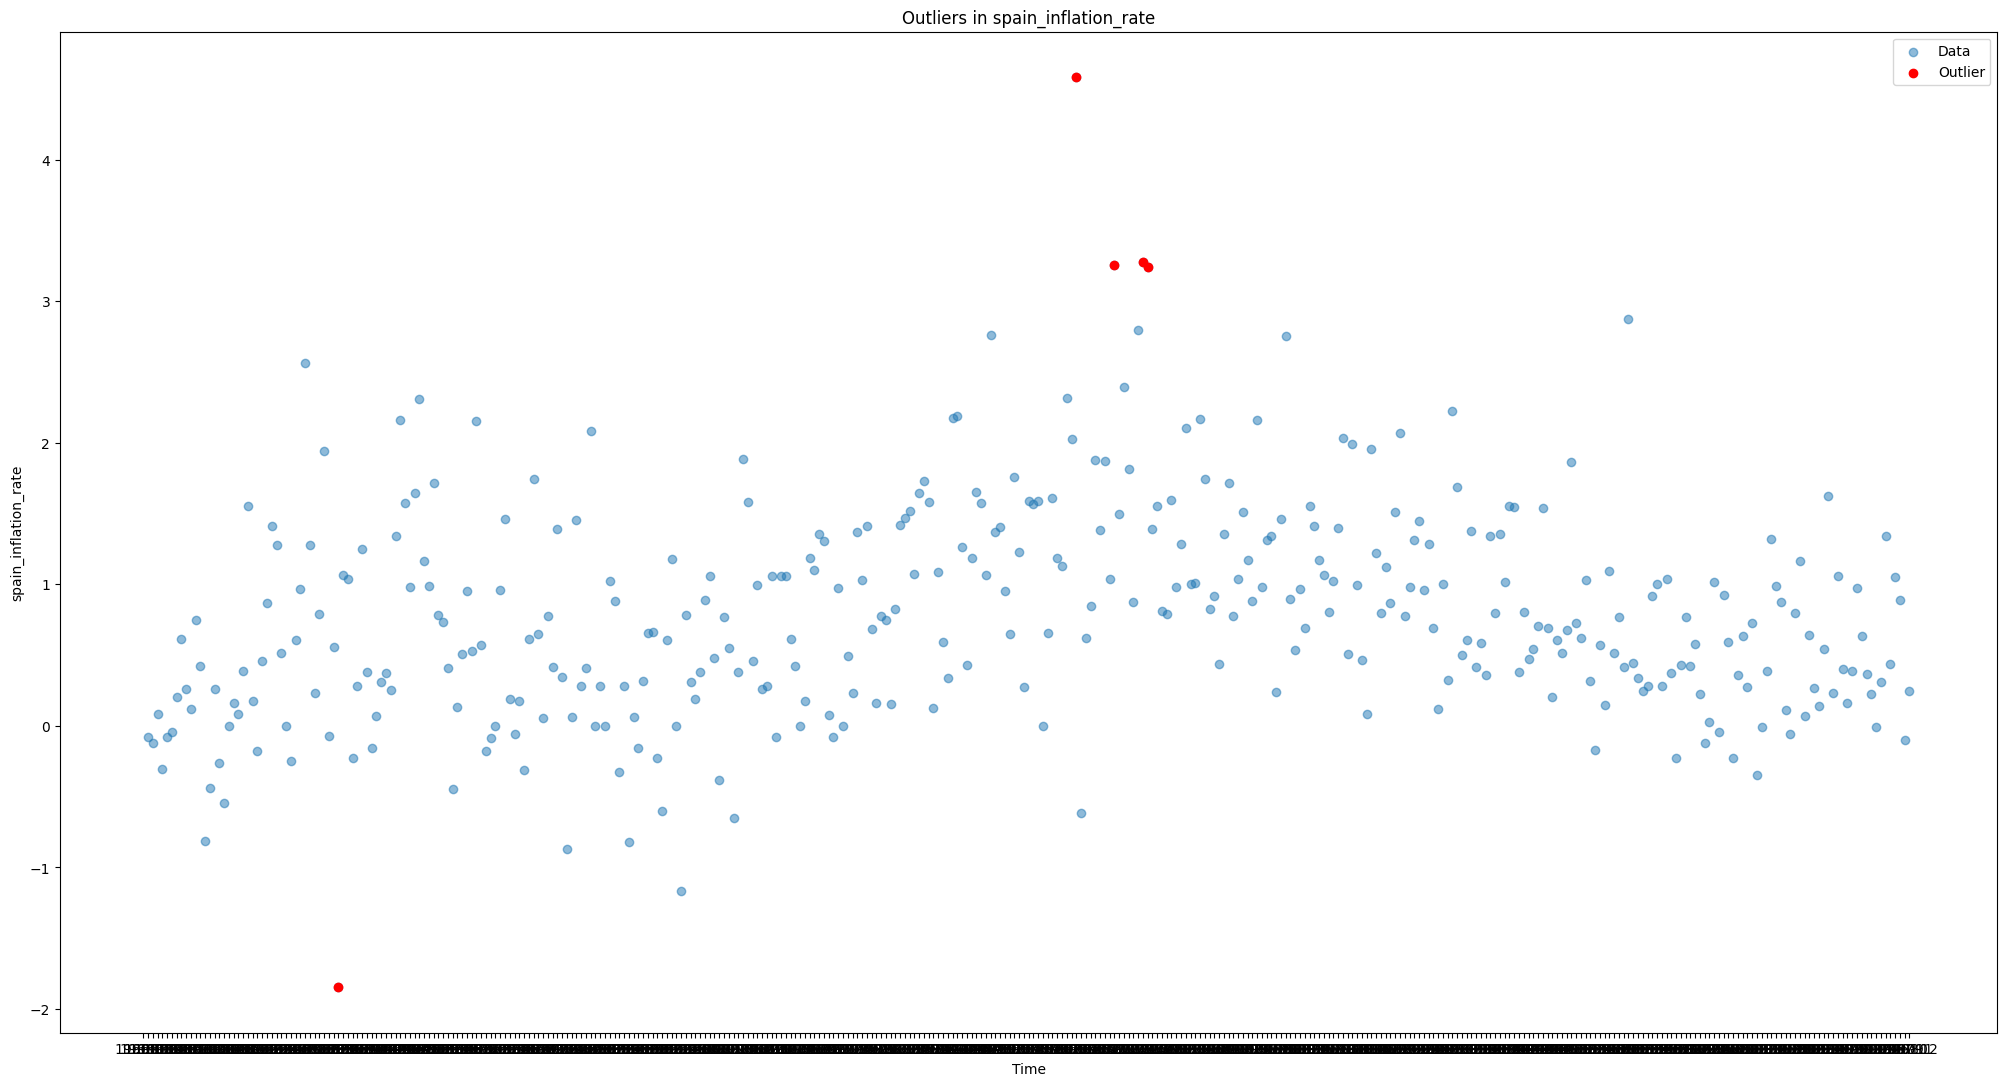

<ipython-input-46-f983b69fb787>:15: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if merged_df[column].dtype == np.number and column != 'Outlier':


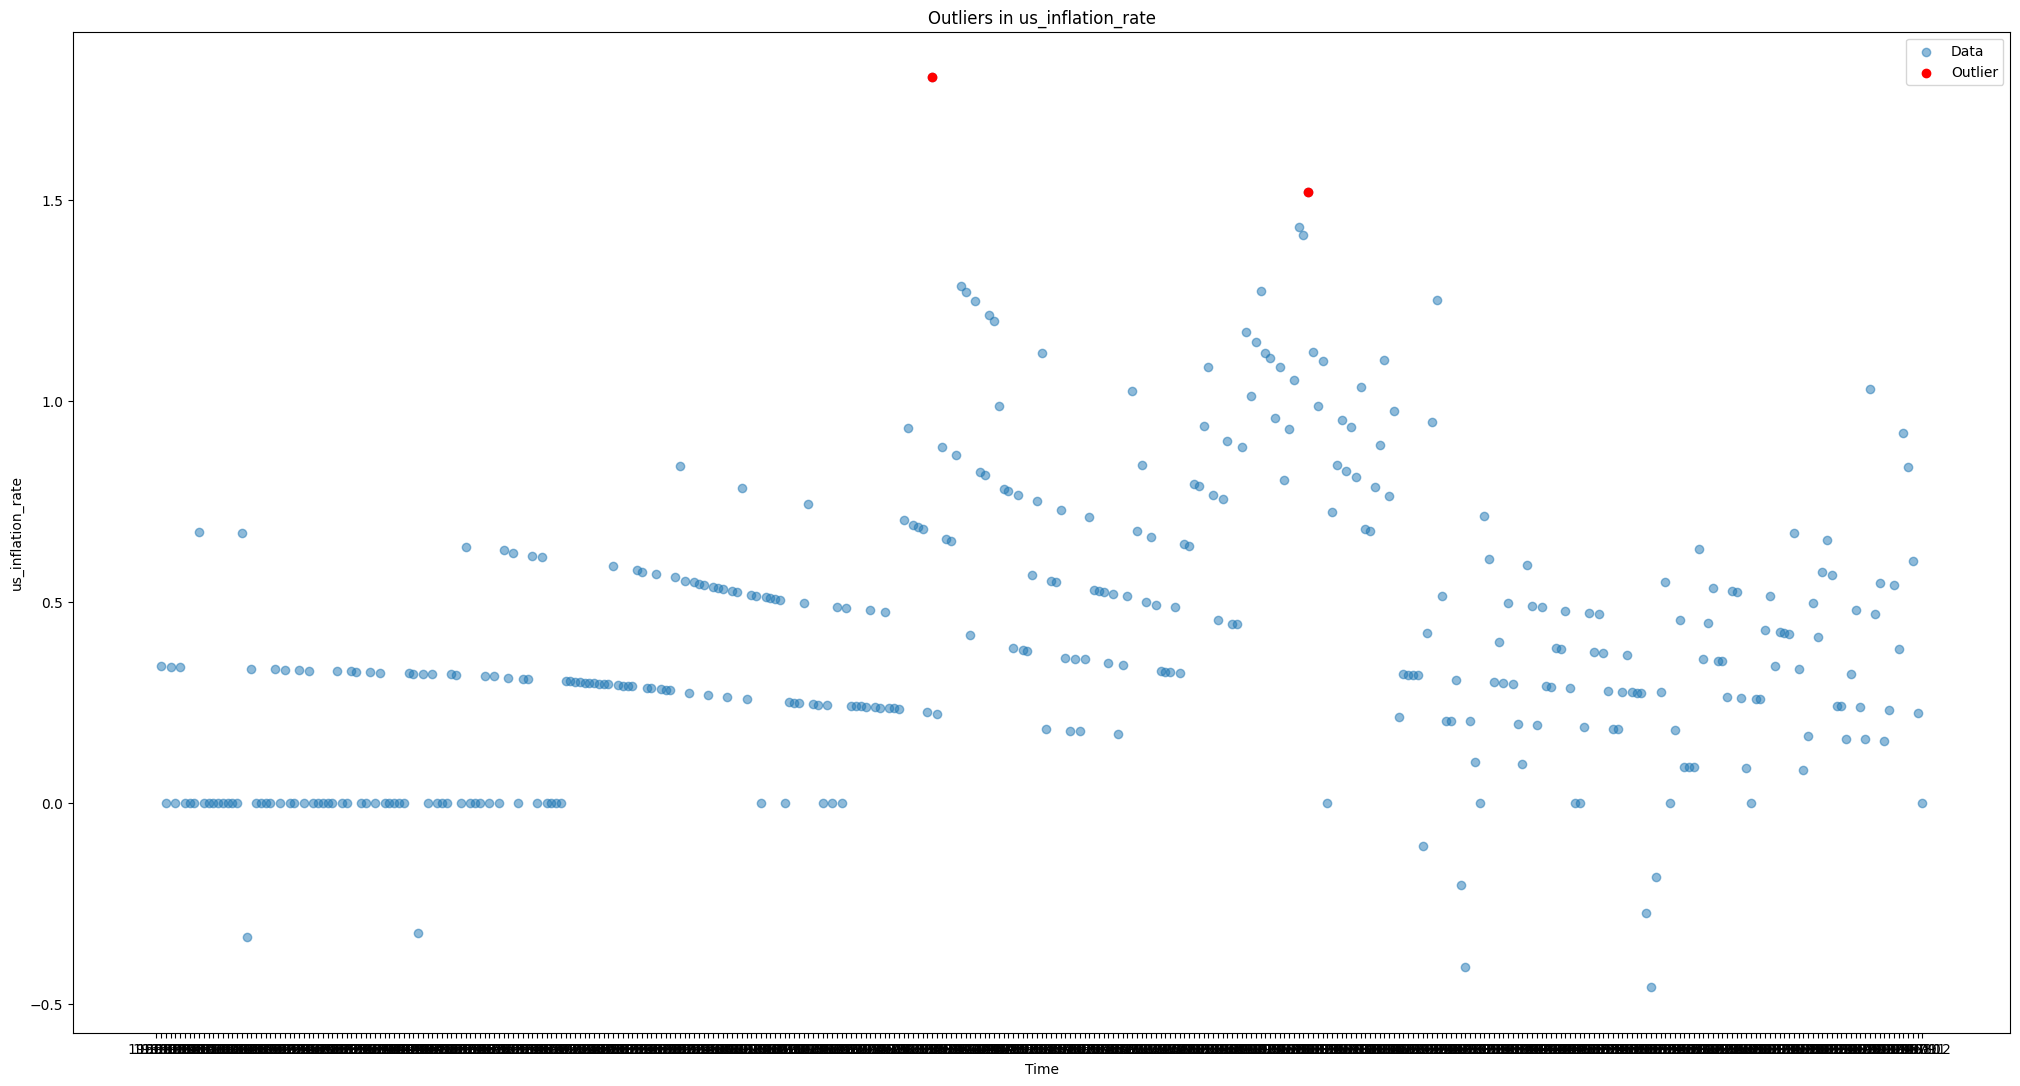

<ipython-input-46-f983b69fb787>:15: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if merged_df[column].dtype == np.number and column != 'Outlier':


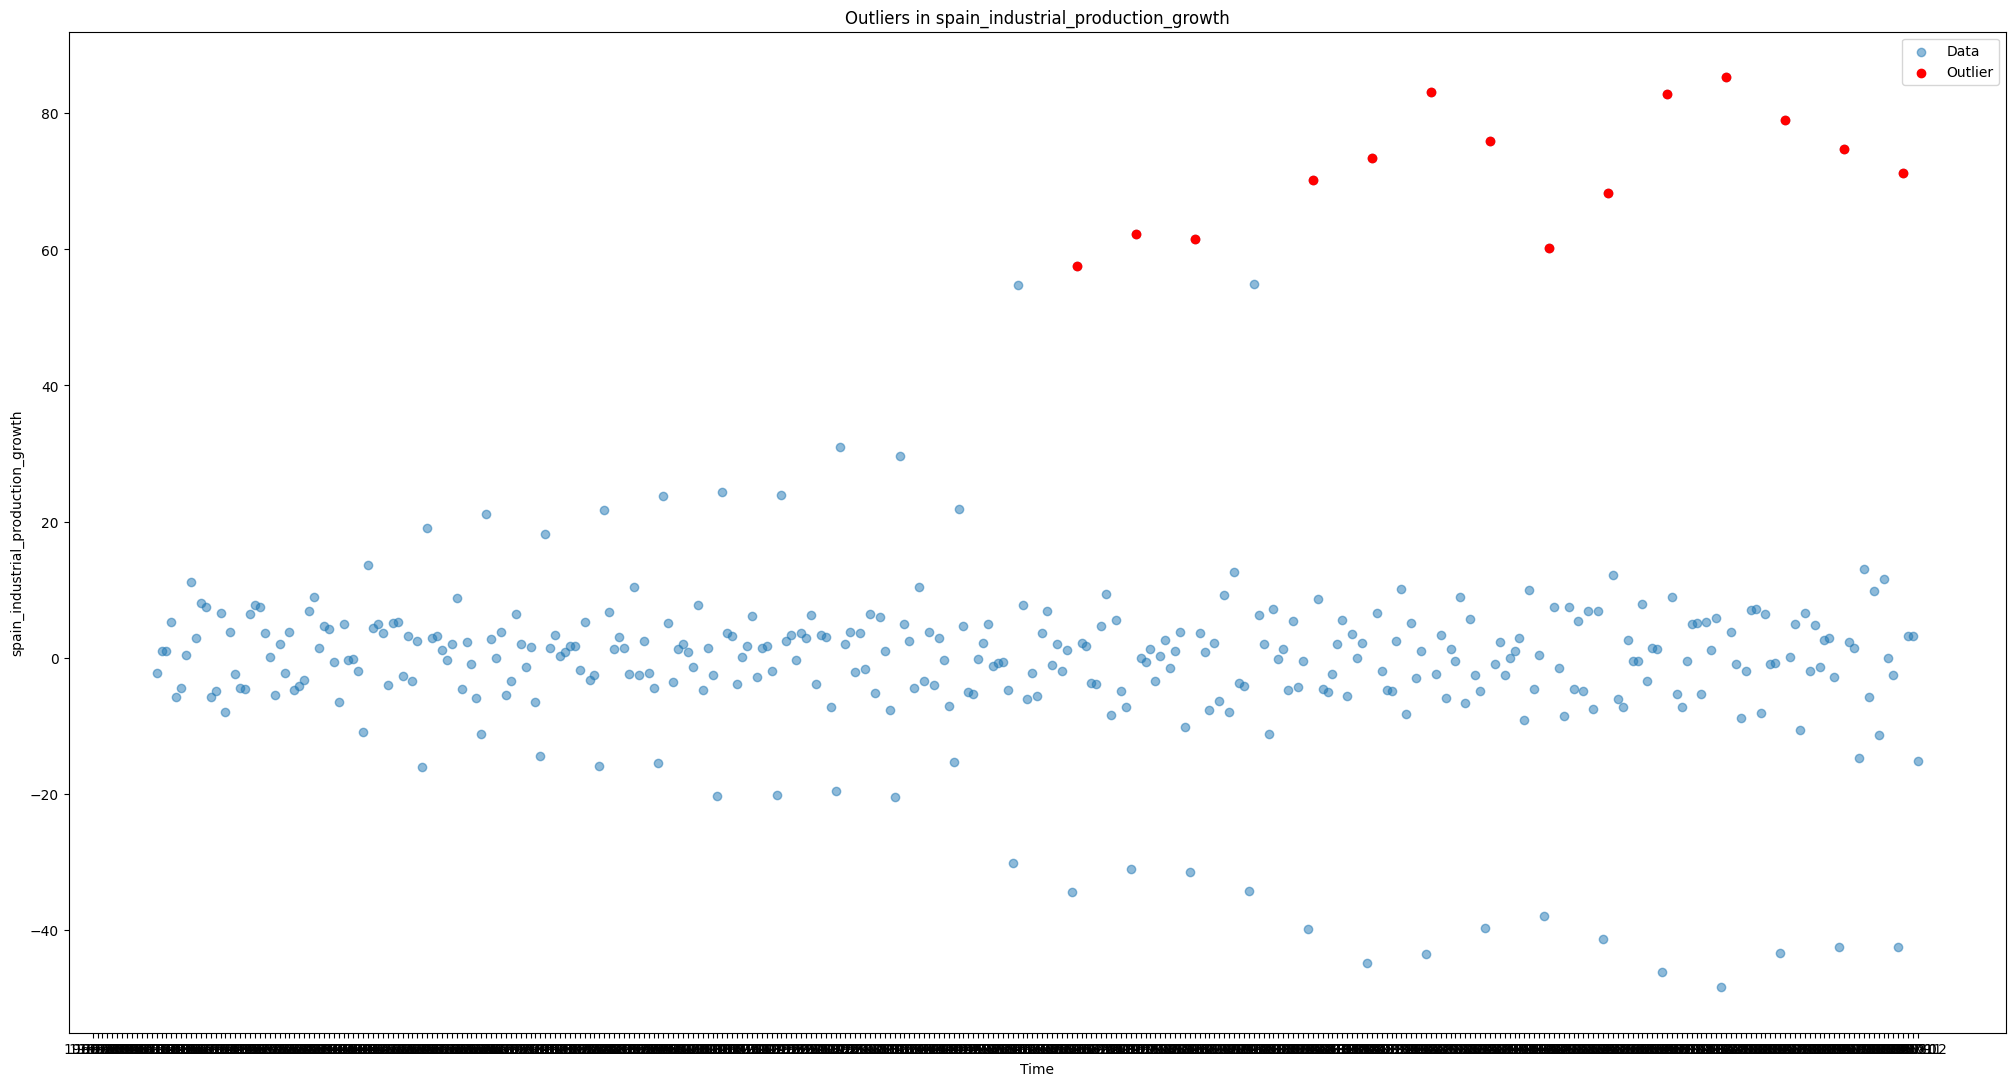

<ipython-input-46-f983b69fb787>:15: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if merged_df[column].dtype == np.number and column != 'Outlier':


In [ ]:
# This function takes a DataFrame as input, identifies outliers in each column using the Z-score method,
# and creates a scatter plot with the outliers marked in red. It then prints out a DataFrame for each column
# with a boolean mask indicating which rows contain outliers.

for column in merged_df.columns:
    # Only interpolate the columns with numerical data
    if 'date' in merged_df.columns:
        merged_df.set_index('date', inplace=True)


def plot_outliers(merged_df):
    data_dict = {}
    for column in merged_df.columns:
        # Skip non-numeric columns and the 'Outlier' column
        if merged_df[column].dtype == np.number and column != 'Outlier':
            # Calculate the standard deviation and mean
            std = merged_df[column].std()
            mean = merged_df[column].mean()

            # Check if the standard deviation is zero (which means no variation in your data)
            if std == 0:
                print(f"No variation in data for column '{column}'. All values are likely the same.")
                data_dict[column] = {'Outlier': np.full(len(merged_df), False)}
                continue

            # Identify outliers using the Z-score method
            z_scores = np.abs((merged_df[column] - mean) / std)
            outlier_mask = z_scores > 3

            # Create a DataFrame to store the data with outliers
            data_w_outliers = pd.DataFrame()
            data_w_outliers[column] = merged_df[column]
            data_w_outliers['Outlier'] = outlier_mask

            # Plot the scatter plot and mark outliers in red
            plt.figure(figsize=(25, 13))
            plt.scatter(data_w_outliers.index, data_w_outliers[column], alpha=0.5, label='Data')
            plt.scatter(data_w_outliers.loc[data_w_outliers['Outlier']].index,
                        data_w_outliers.loc[data_w_outliers['Outlier'], column],
                        color='red', label='Outlier')
            plt.xlabel('Time')
            plt.ylabel(column)
            plt.title(f'Outliers in {column}')
            plt.legend()
            plt.show()

            # Add the DataFrame to the dictionary
            data_dict[column] = data_w_outliers

    return data_dict

# Call the function and store the output in data_dict
all_data_w_outlier = plot_outliers(merged_df)


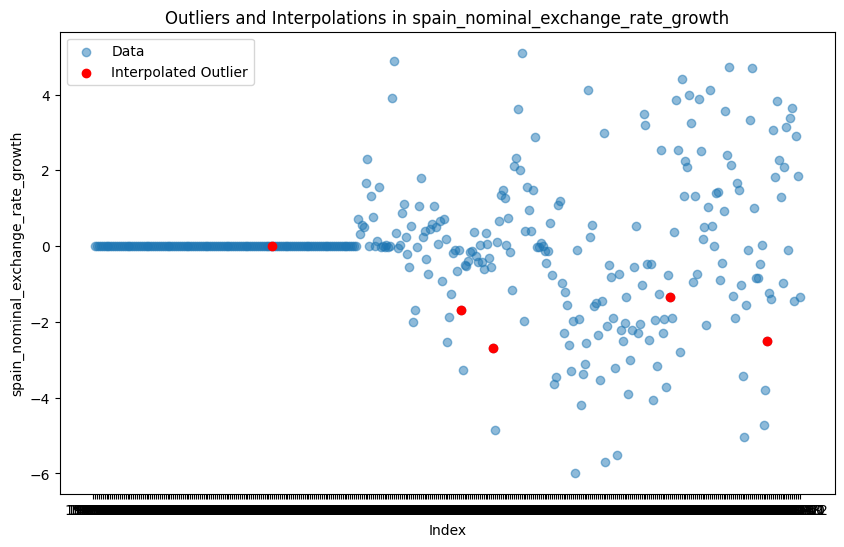

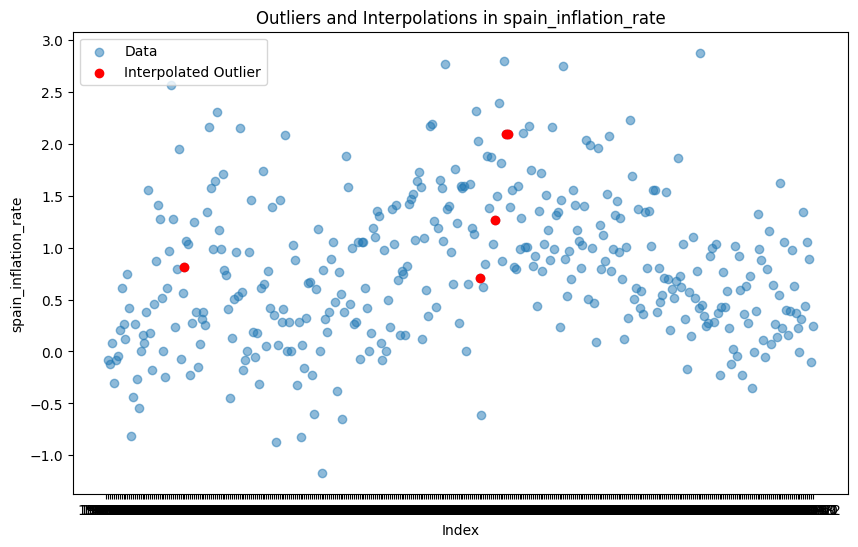

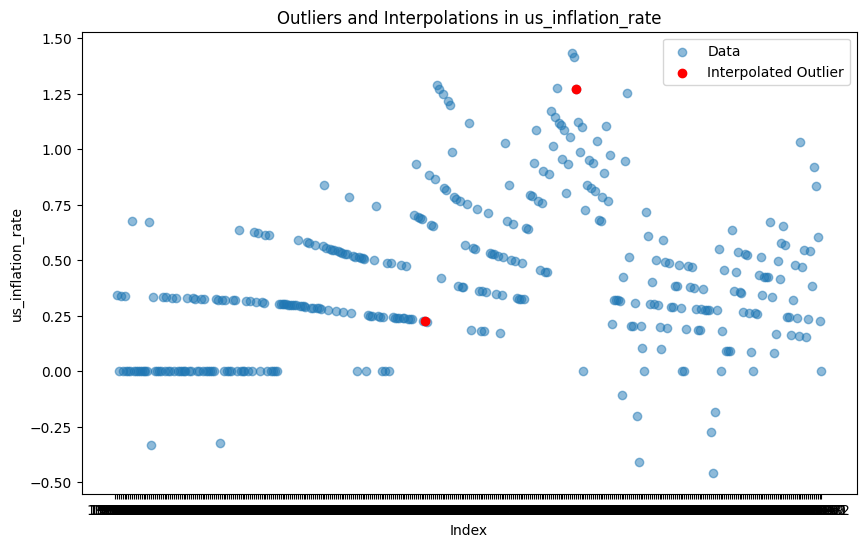

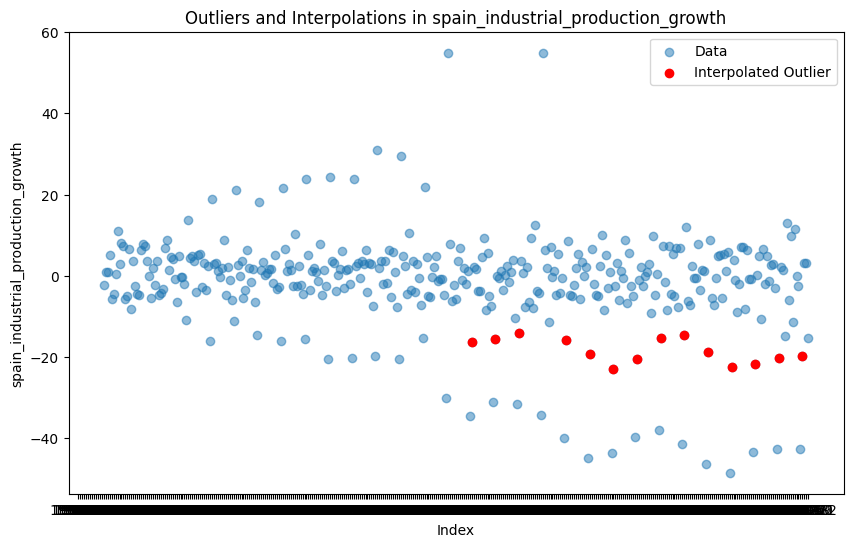

In [ ]:
def interpolate_outliers(data_w_outliers, column):
    # Track indices of interpolated values
    interpolated_indices = []

    # Iterate over the DataFrame using index labels
    for idx, row in data_w_outliers.iterrows():
        if row['Outlier']:
            # Filter directly within the slicing operation to avoid reindexing warning
            prev_slice = data_w_outliers.loc[:idx][data_w_outliers.loc[:idx]['Outlier'] == False]
            next_slice = data_w_outliers.loc[idx:][data_w_outliers.loc[idx:]['Outlier'] == False]

            try:
                # Use last_valid_index and first_valid_index to handle empty slices
                prev_index = prev_slice.index[-1] if not prev_slice.empty else None
                next_index = next_slice.index[0] if not next_slice.empty else None
            except IndexError:
                prev_index = None
                next_index = None

            # Ensure both indices are valid and perform interpolation
            if prev_index is not None and next_index is not None and prev_index != next_index:
                mean_val = np.mean([data_w_outliers.at[prev_index, column], data_w_outliers.at[next_index, column]])
                data_w_outliers.at[idx, column] = mean_val
                interpolated_indices.append(idx)

    return data_w_outliers, interpolated_indices

def plot_outliers(merged_df):
    data_dict = {}
    for column in merged_df.columns:
        # Check if the column is numeric and not labeled as 'Outlier'
        if np.issubdtype(merged_df[column].dtype, np.number) and column != 'Outlier':
            # Calculate standard deviation and mean
            std = merged_df[column].std()
            mean = merged_df[column].mean()
            # Calculate Z-scores to identify outliers
            z_scores = np.abs((merged_df[column] - mean) / std)
            outlier_mask = z_scores > 3

            # Create DataFrame to store data with outliers
            data_w_outliers = pd.DataFrame()
            data_w_outliers[column] = merged_df[column]
            data_w_outliers['Outlier'] = outlier_mask

            # Interpolate outliers
            data_w_outliers, interpolated_indices = interpolate_outliers(data_w_outliers, column)

            # Plot scatter plot with outliers and interpolated outliers marked
            plt.figure(figsize=(10, 6))
            plt.scatter(data_w_outliers.index, data_w_outliers[column], alpha=0.5, label='Data')
            if interpolated_indices:
                plt.scatter(interpolated_indices,
                            data_w_outliers.loc[interpolated_indices, column],
                            color='red', label='Interpolated Outlier', zorder=5)
            plt.xlabel('Index')
            plt.ylabel(column)
            plt.title(f'Outliers and Interpolations in {column}')
            plt.legend()
            plt.show()

            # Store data with outliers in dictionary
            data_dict[column] = data_w_outliers

    return data_dict

# Replace 'merged_df' with your actual DataFrame variable
# all_data_interpolated = plot_outliers(merged_df)

all_data_interpolated = plot_outliers(merged_df)


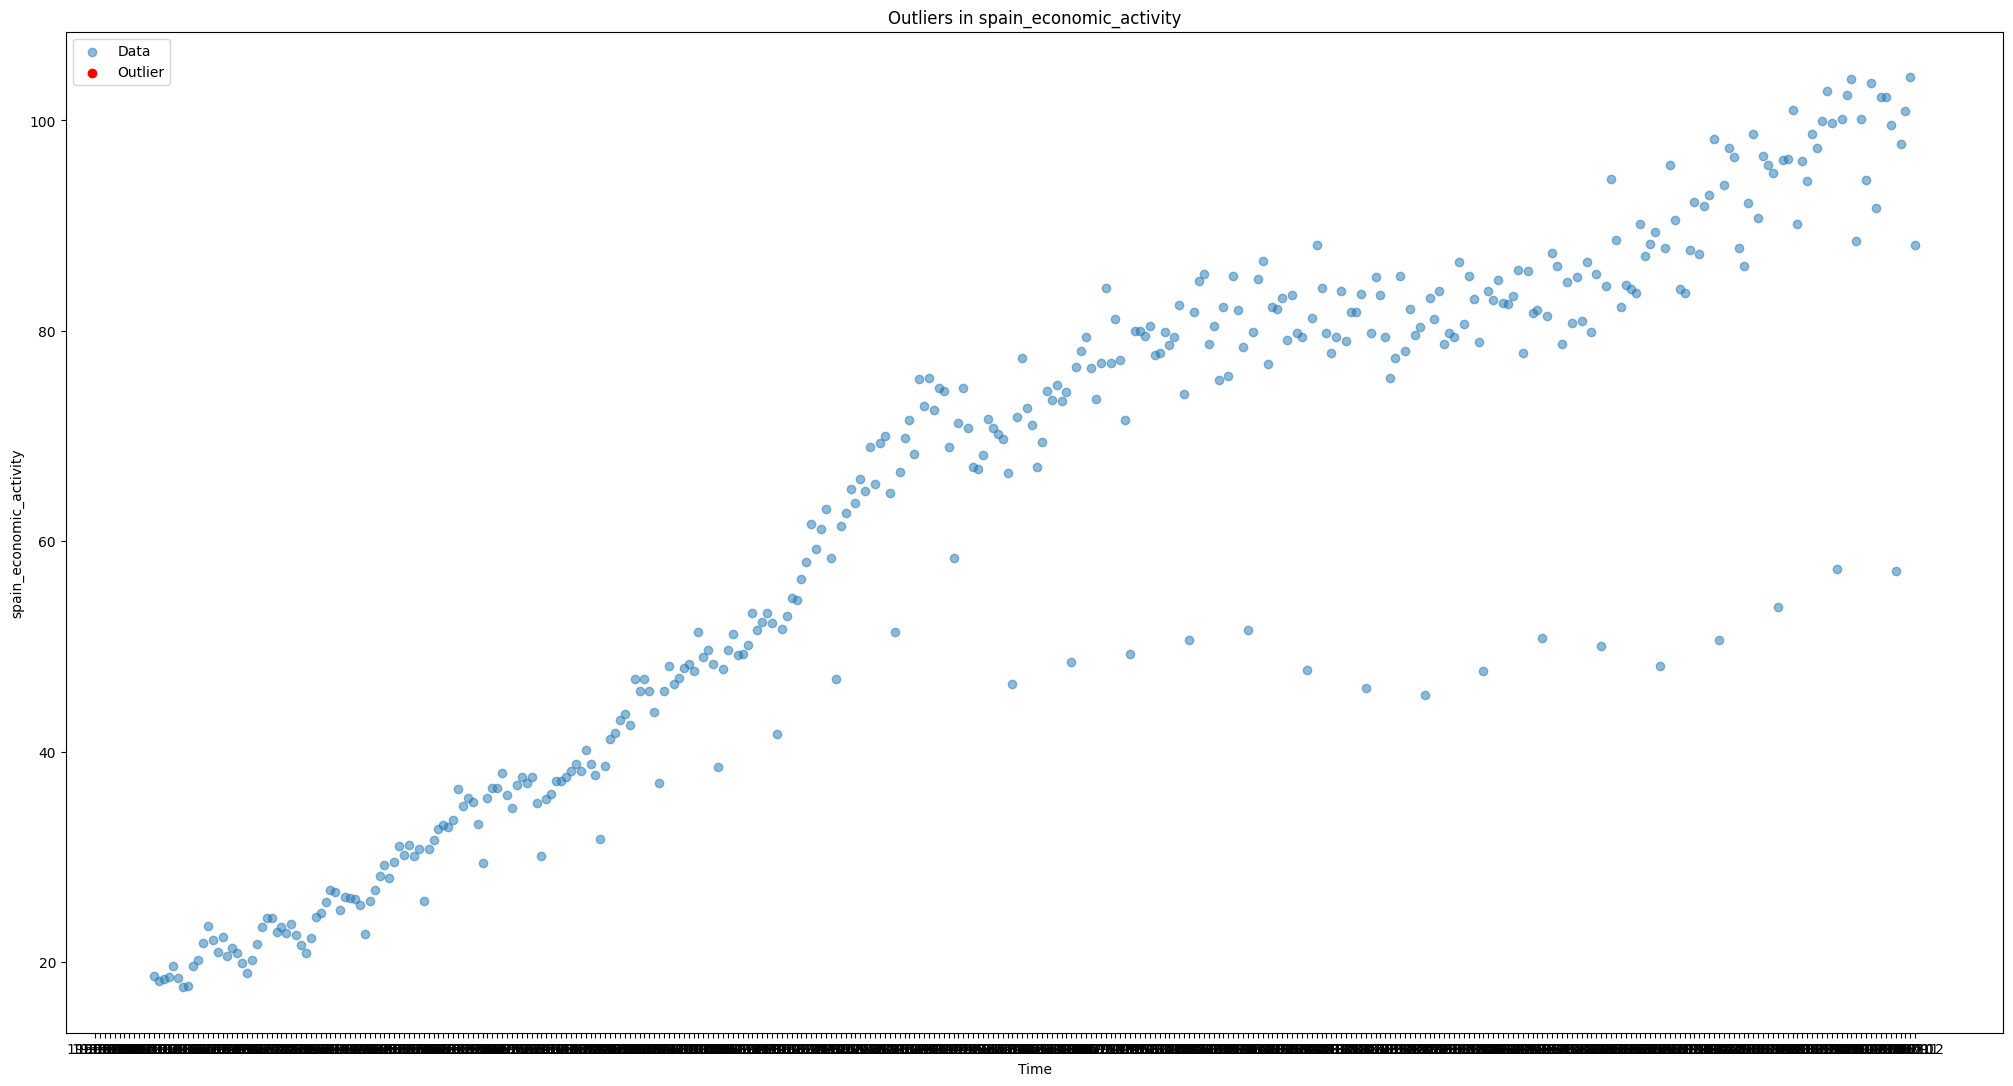

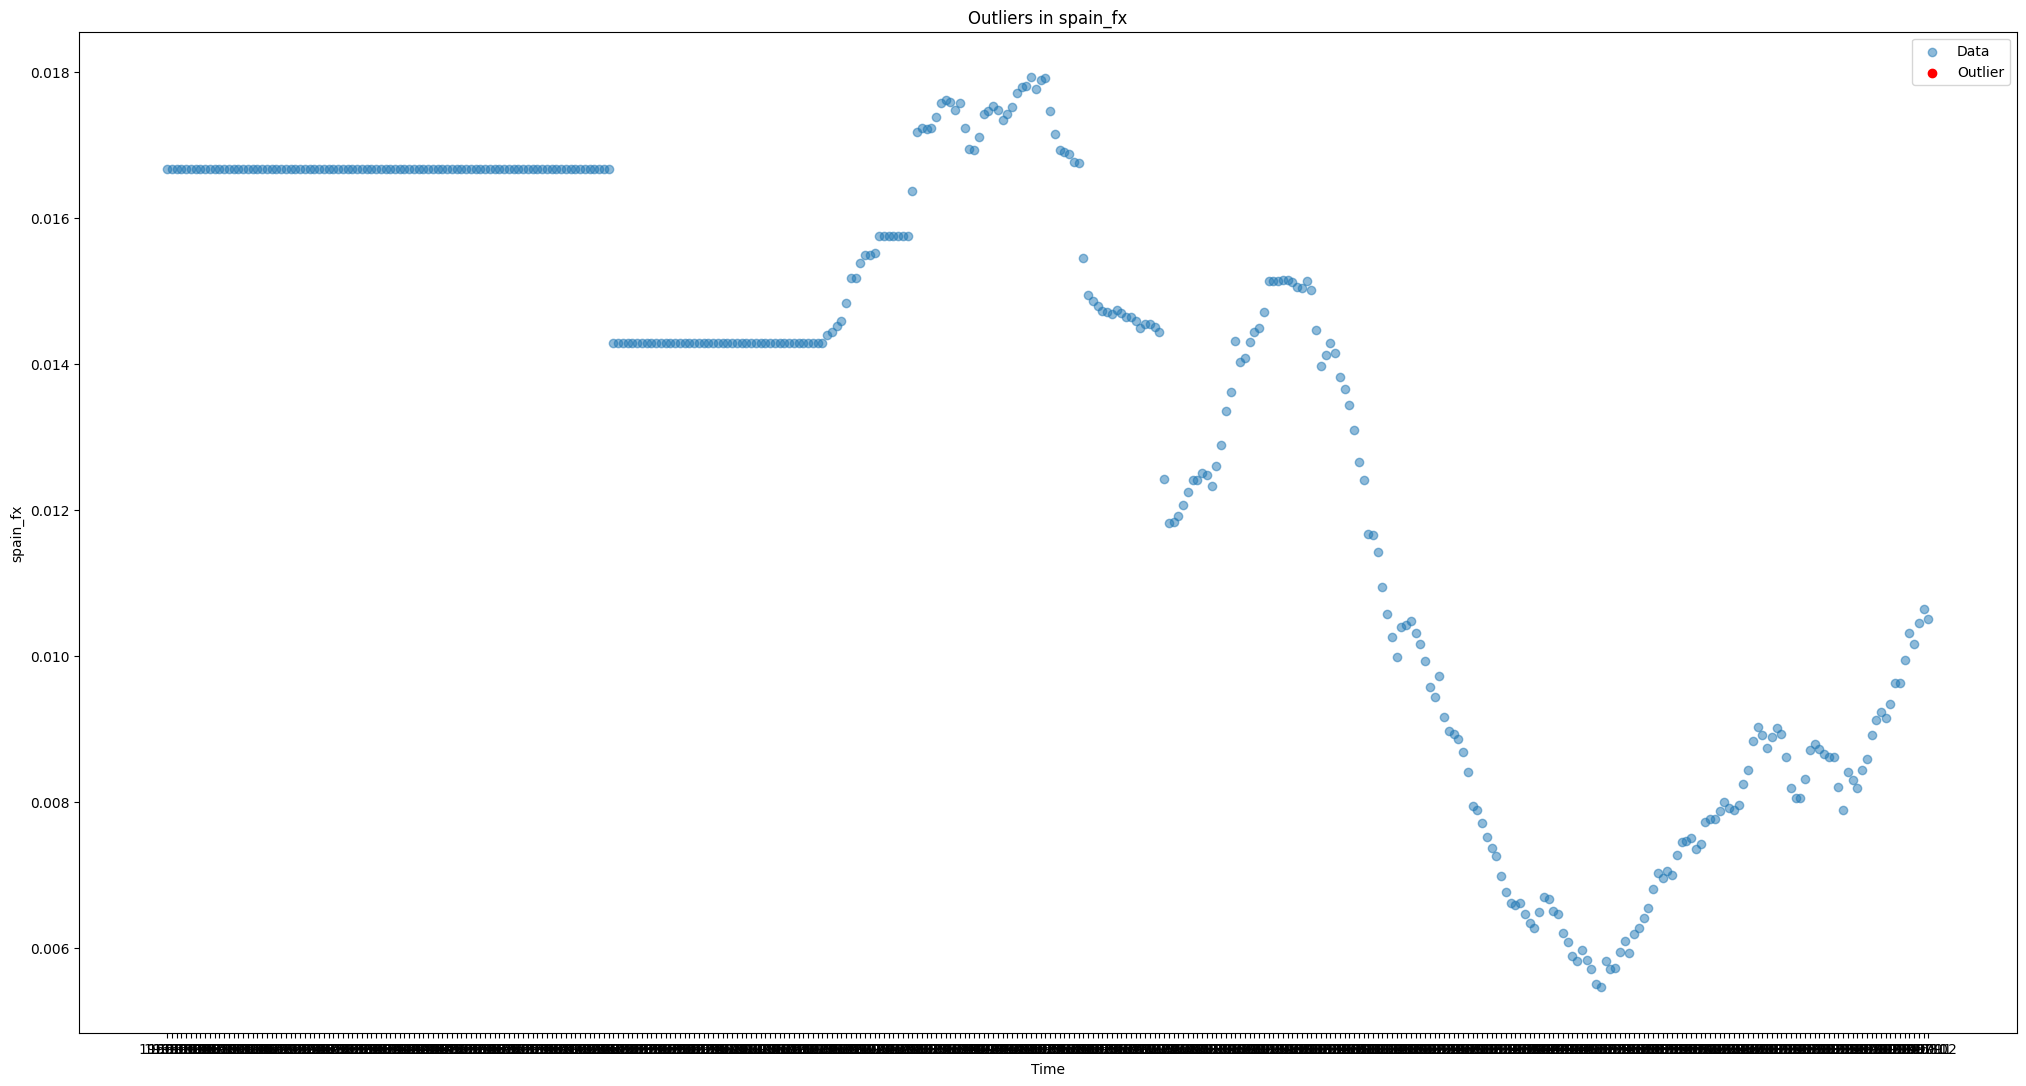

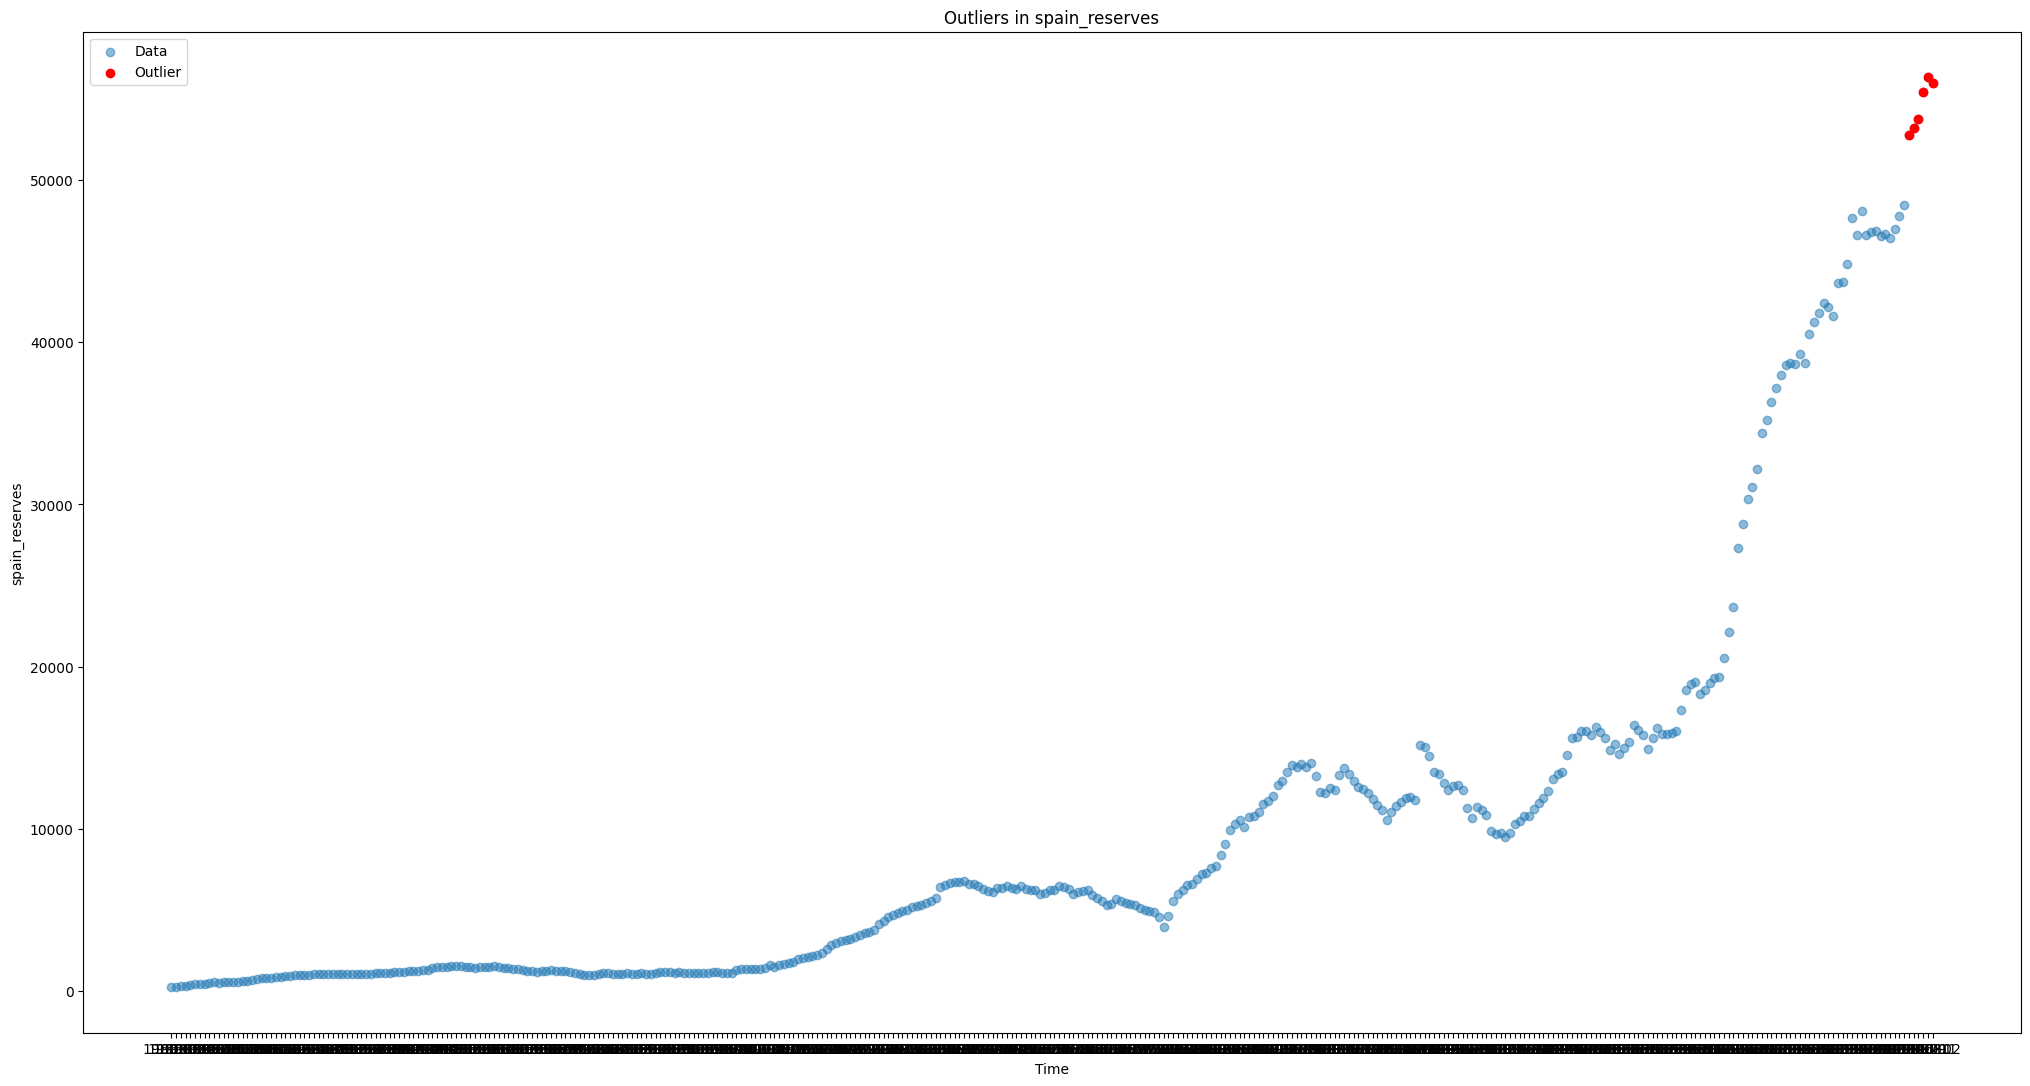

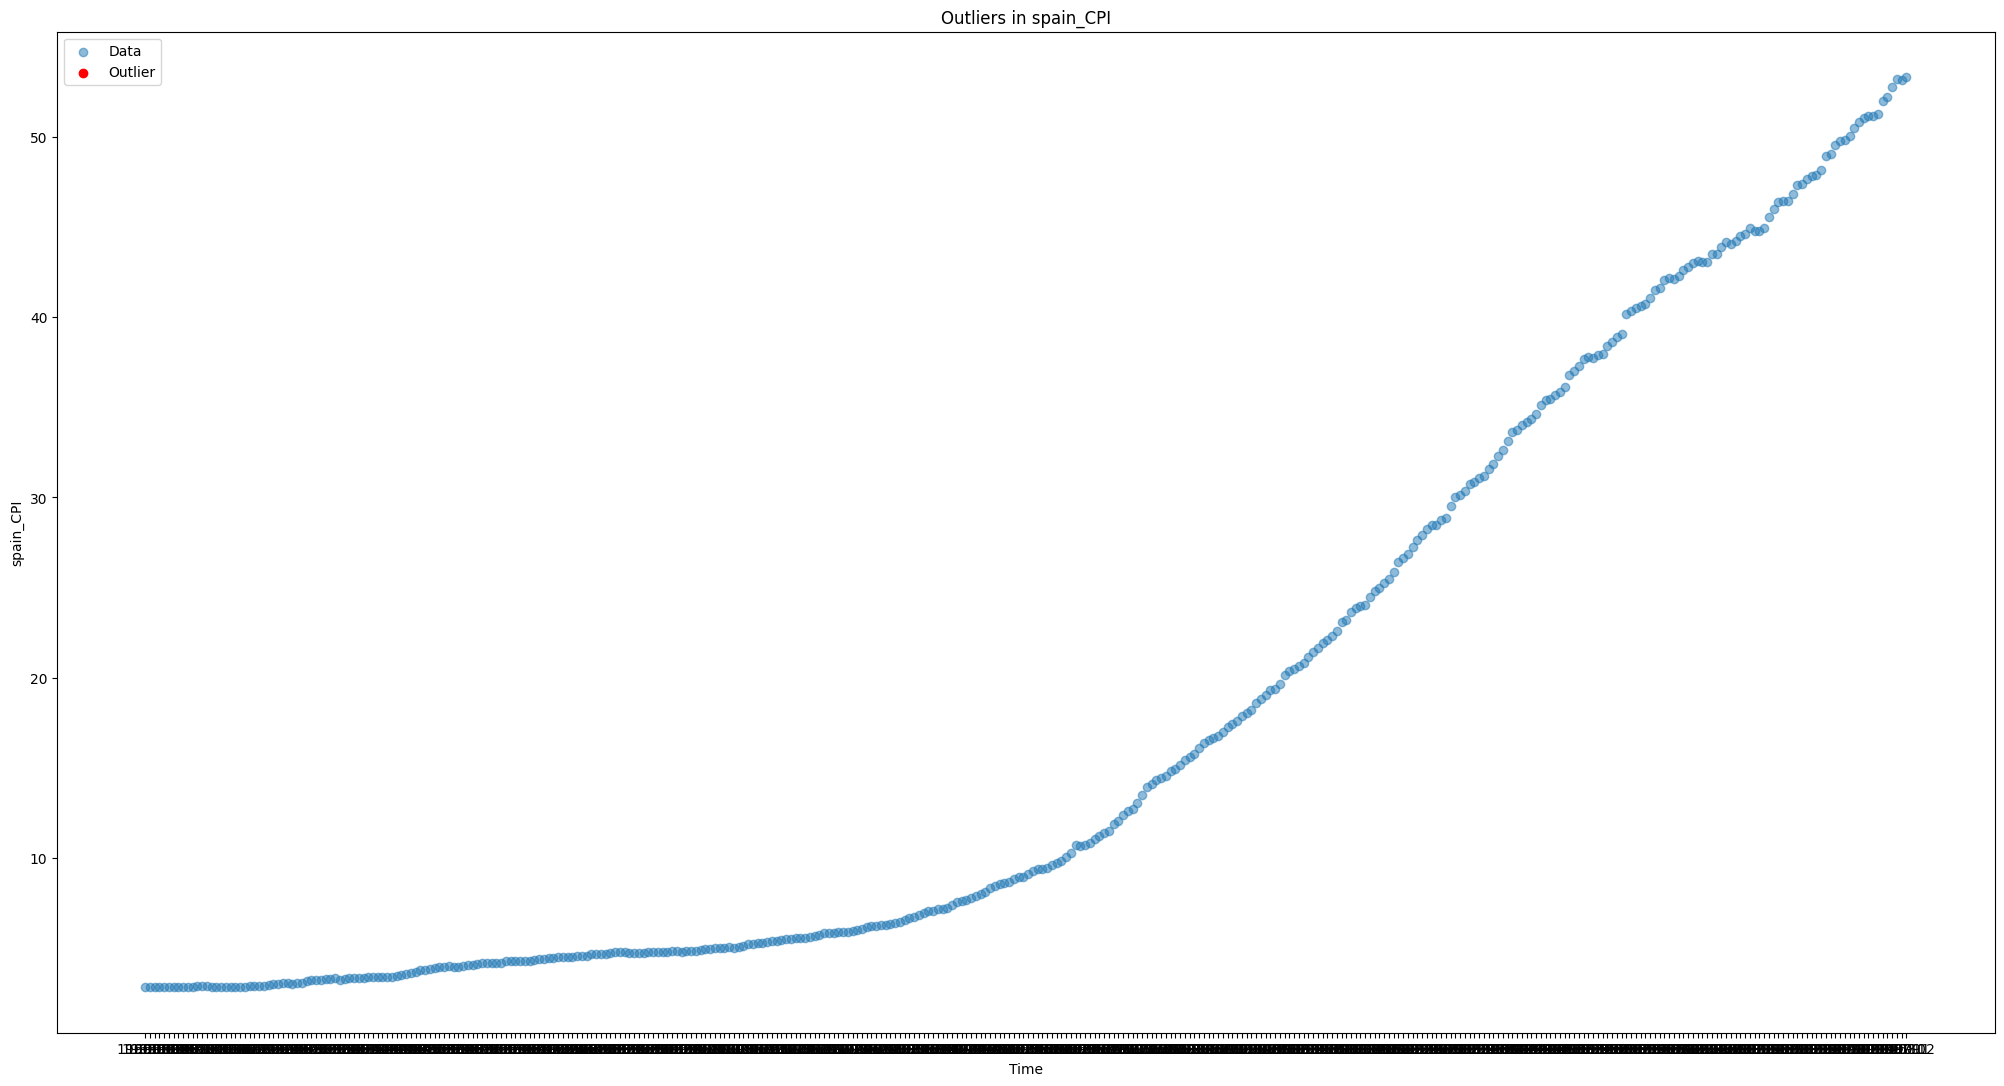

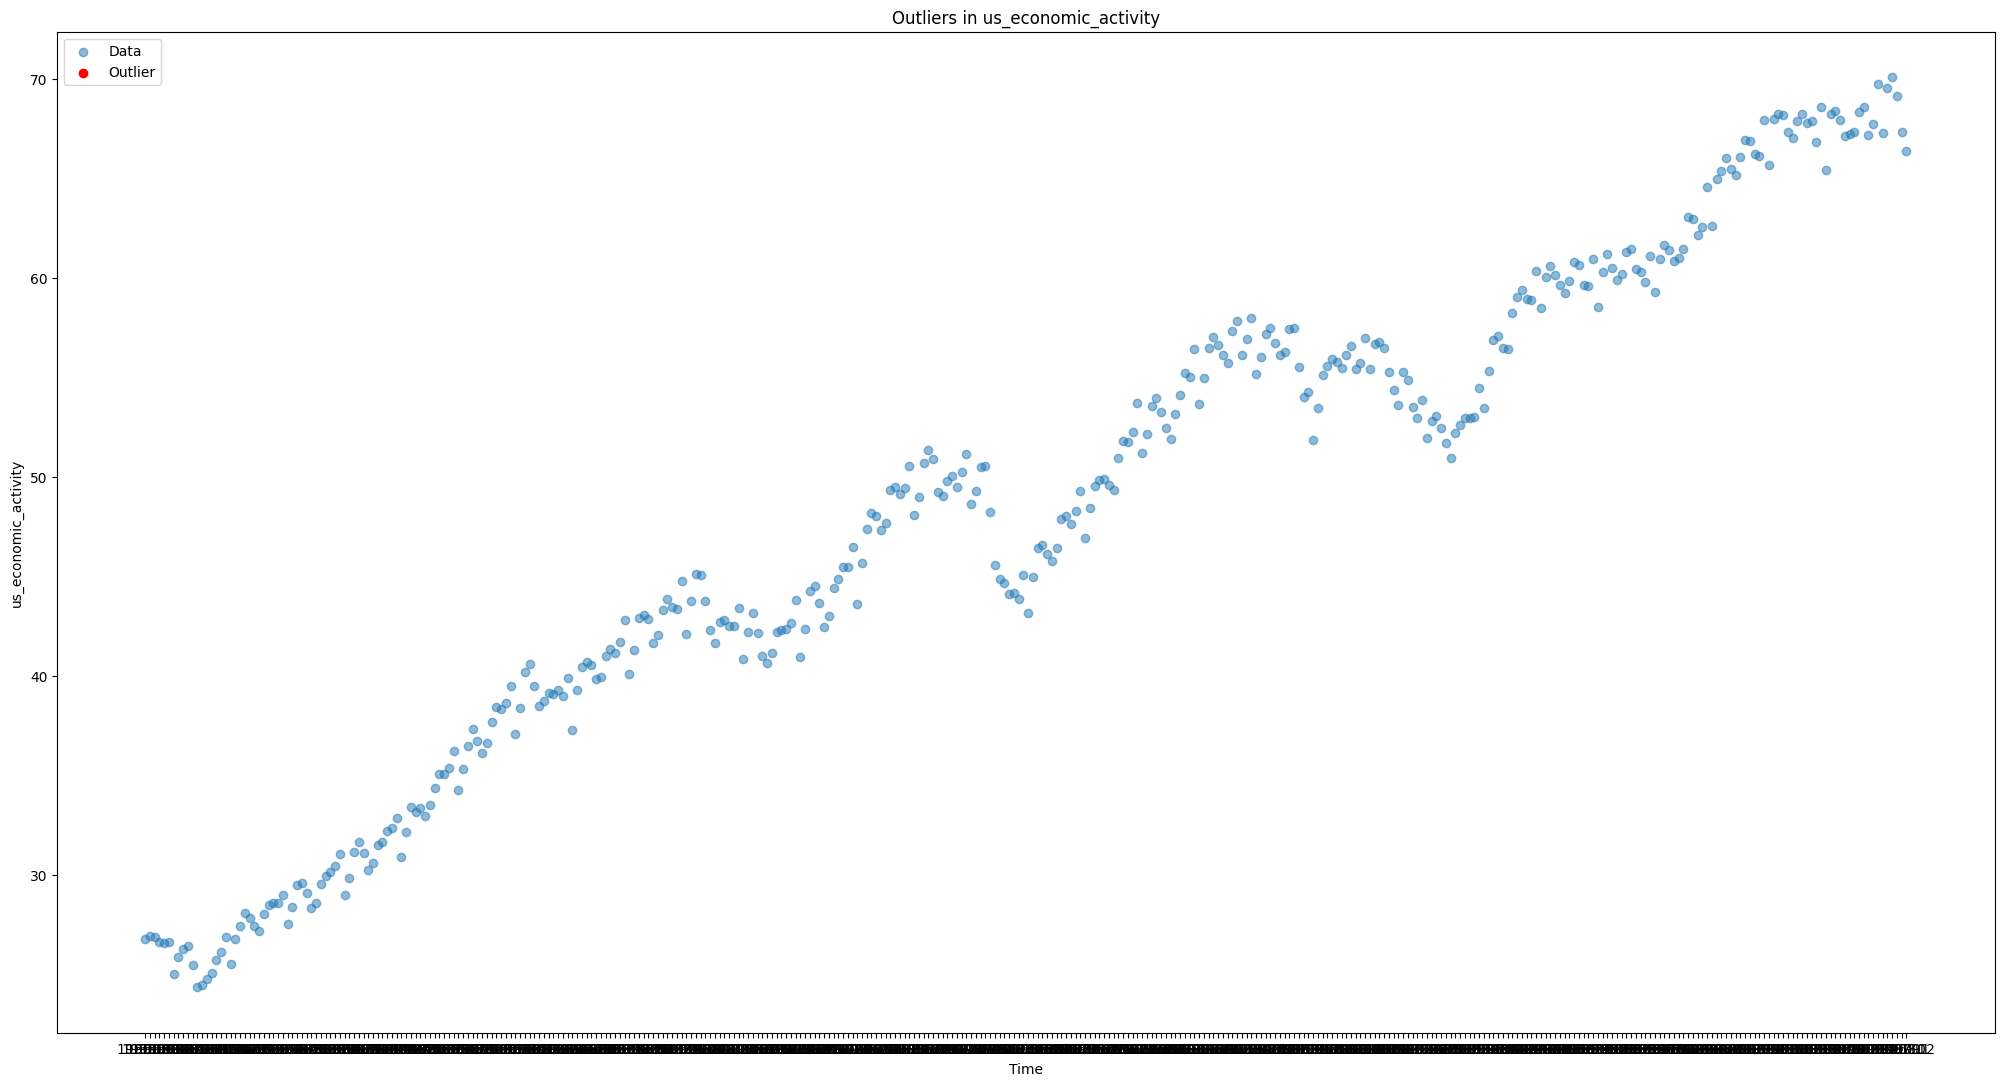

No variation in data for column 'us_exchange_rate'. All values are likely the same.


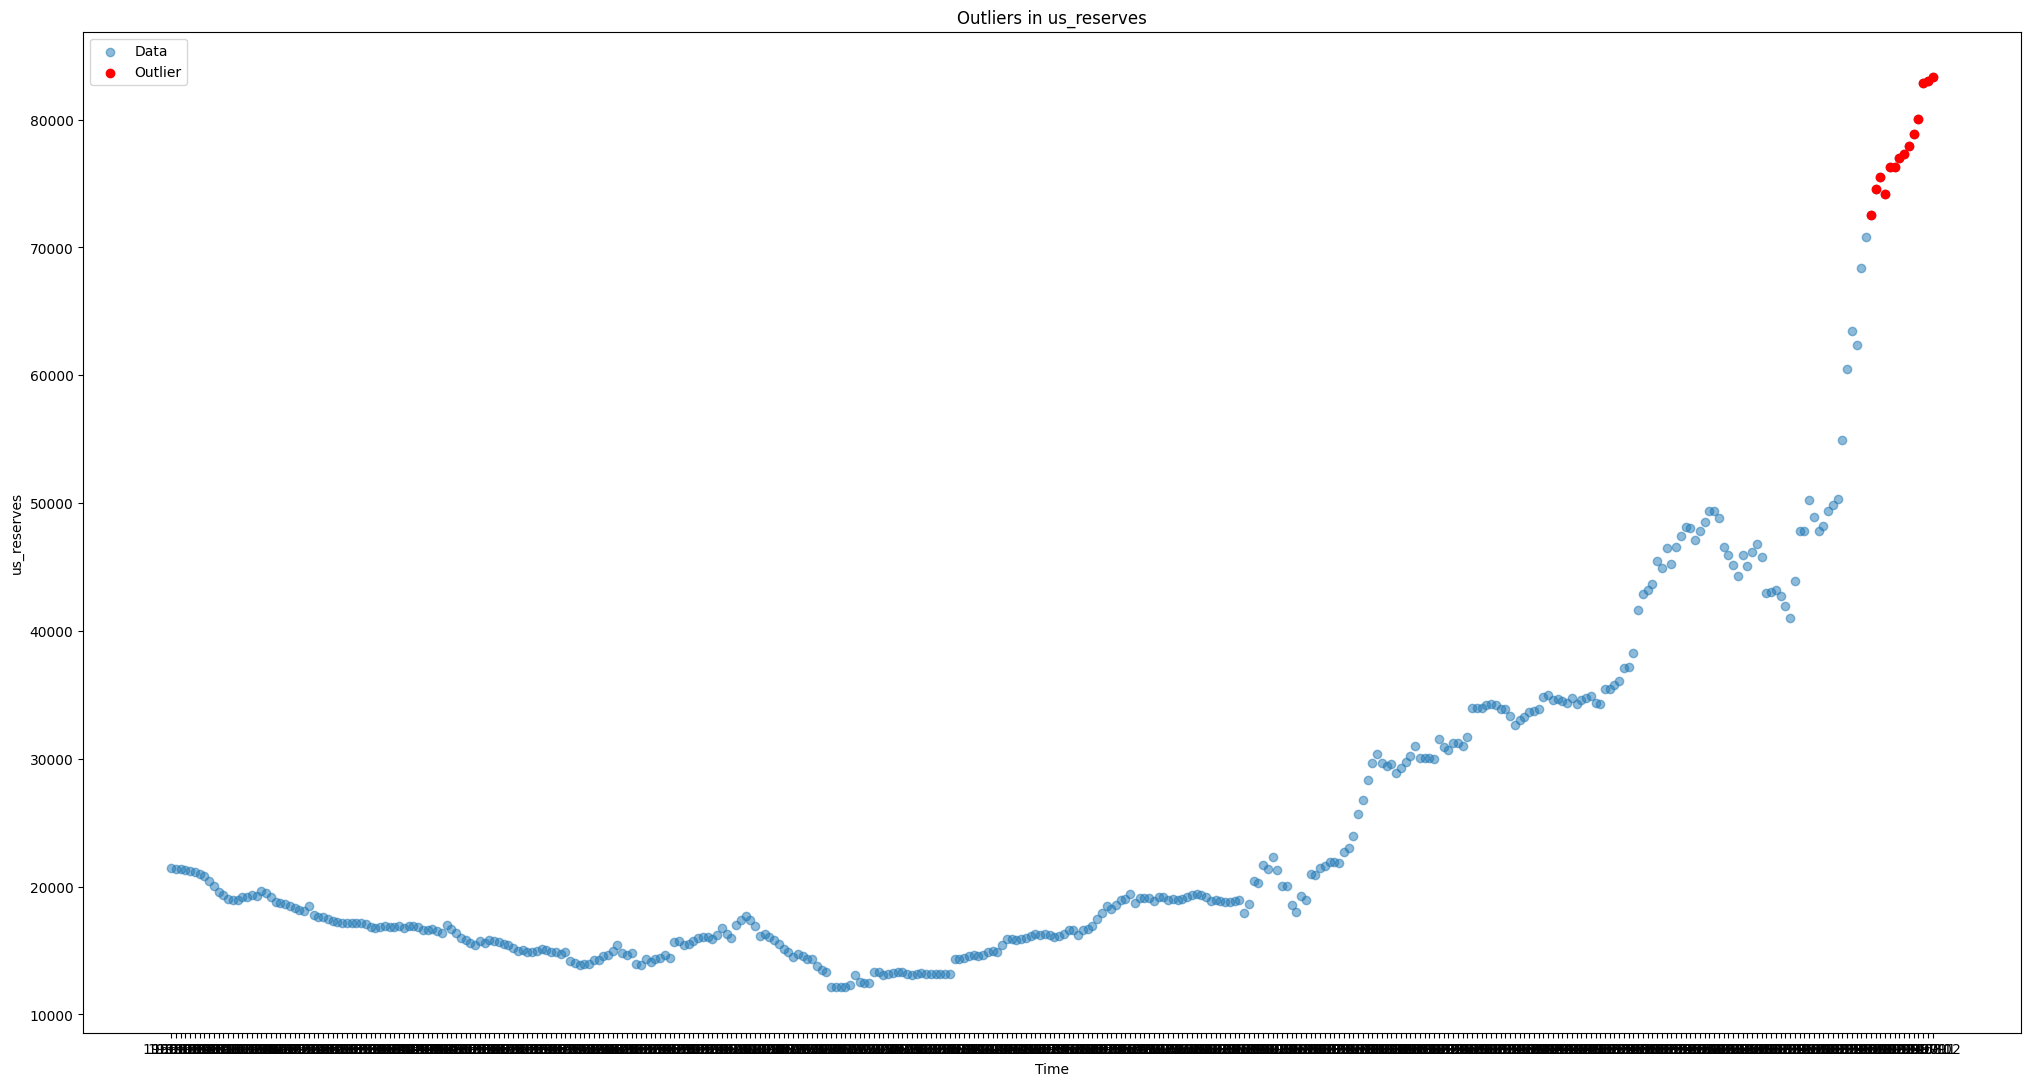

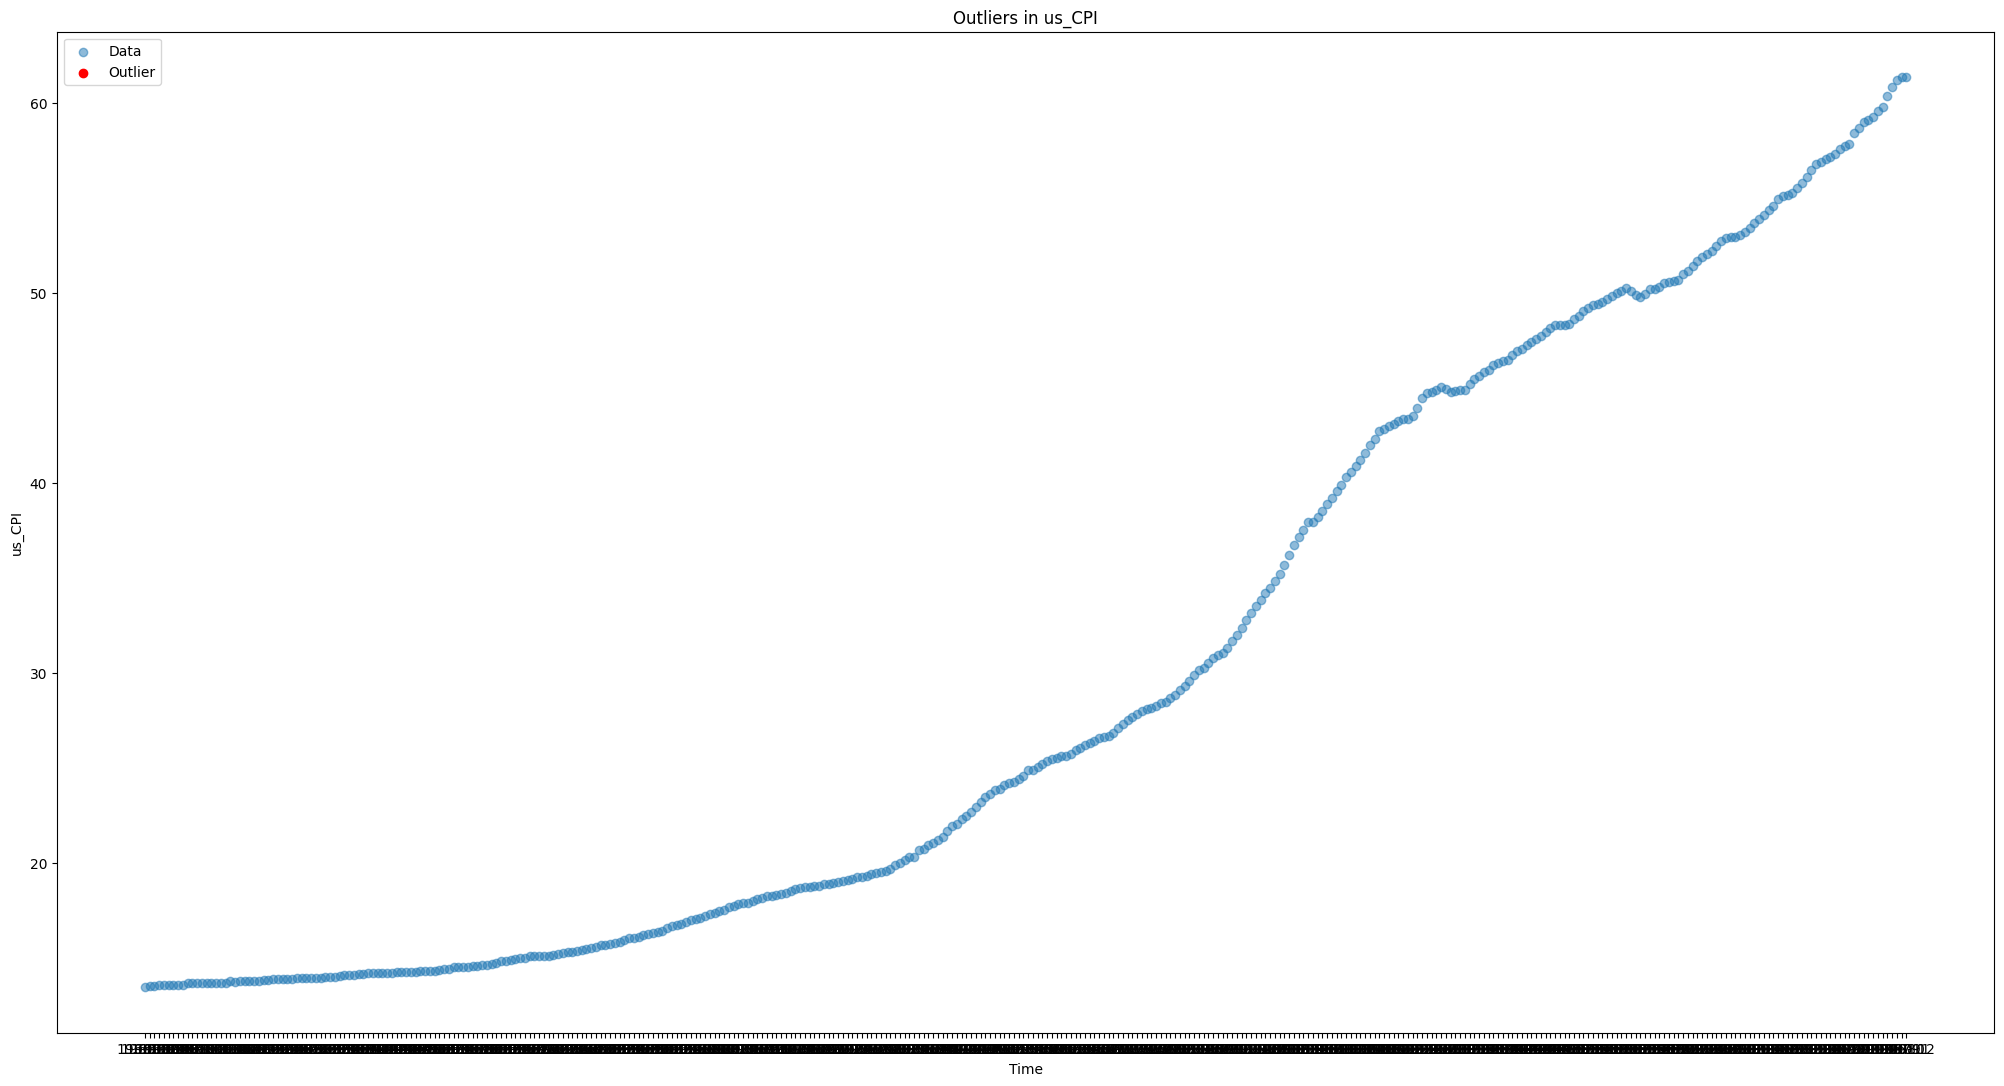

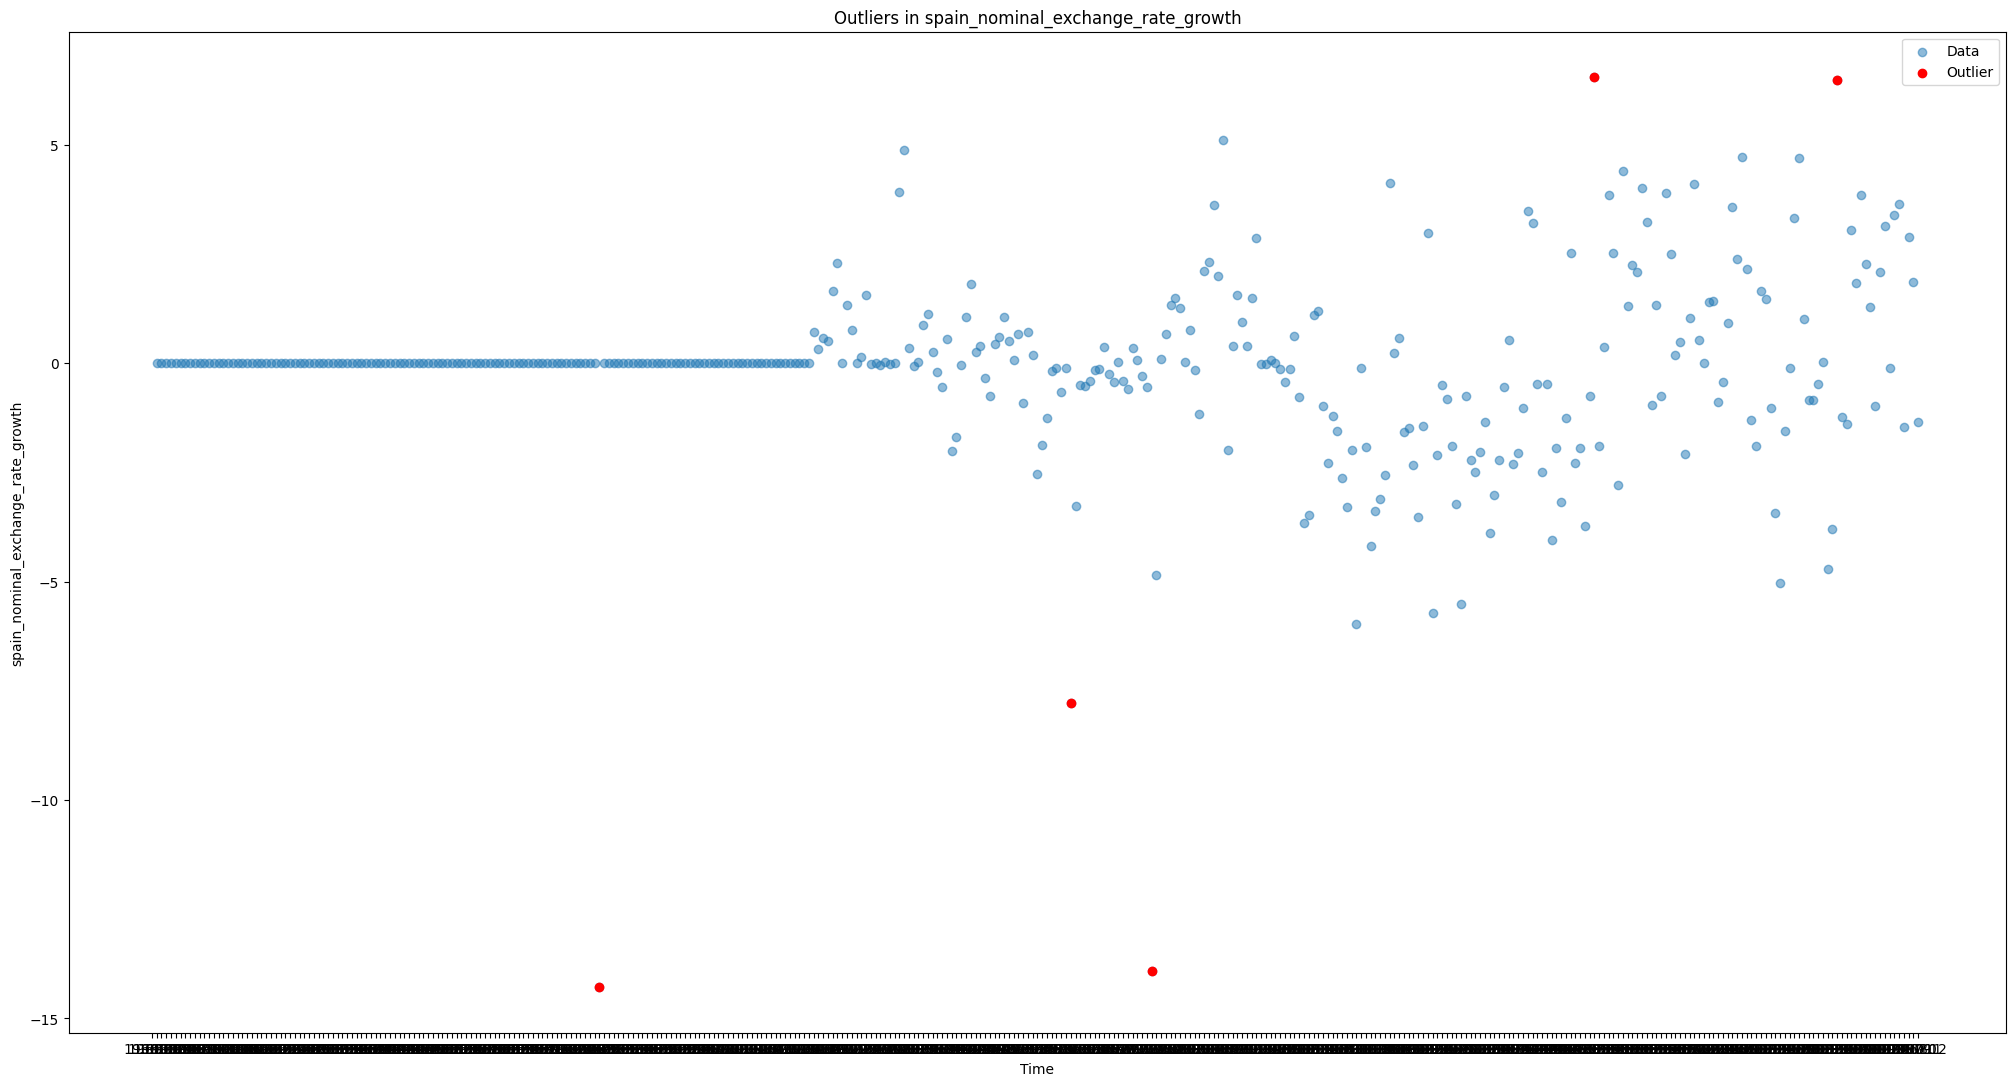

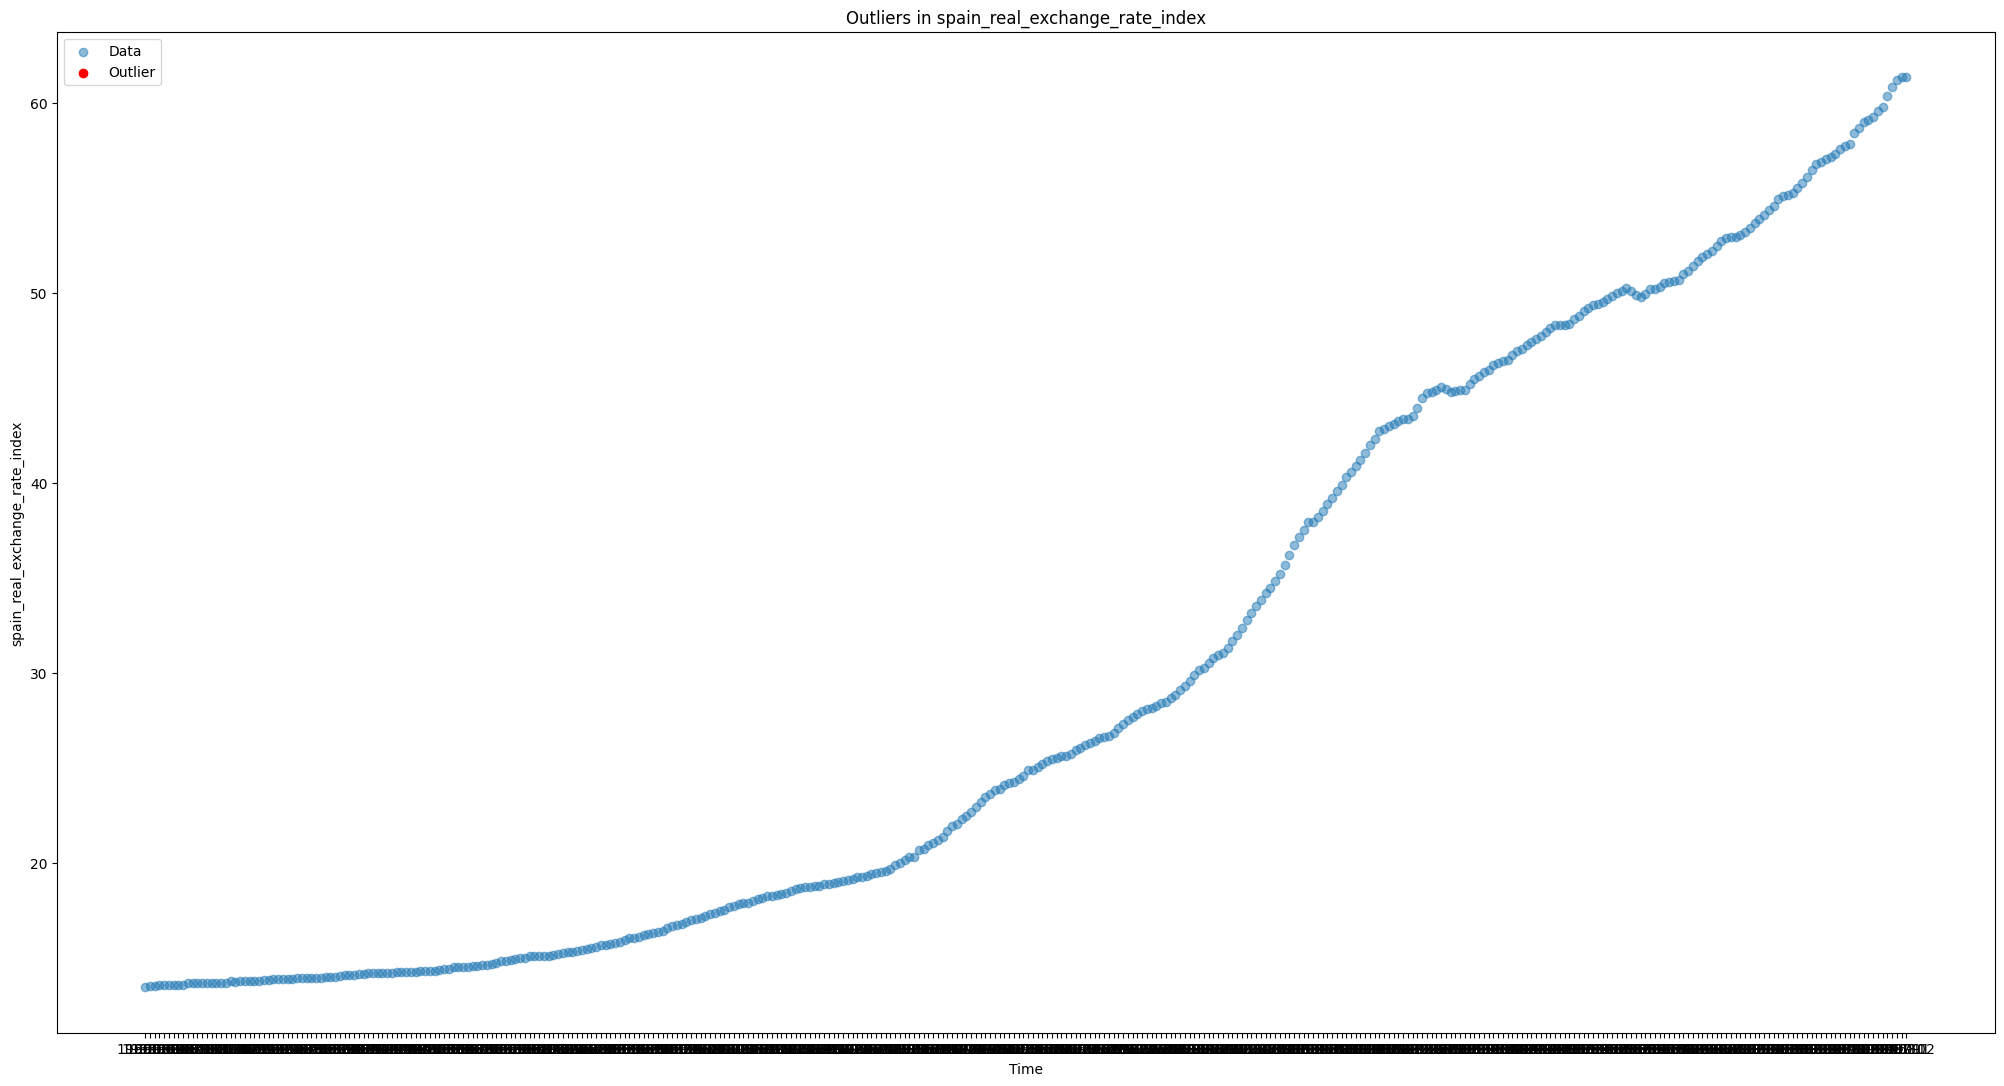

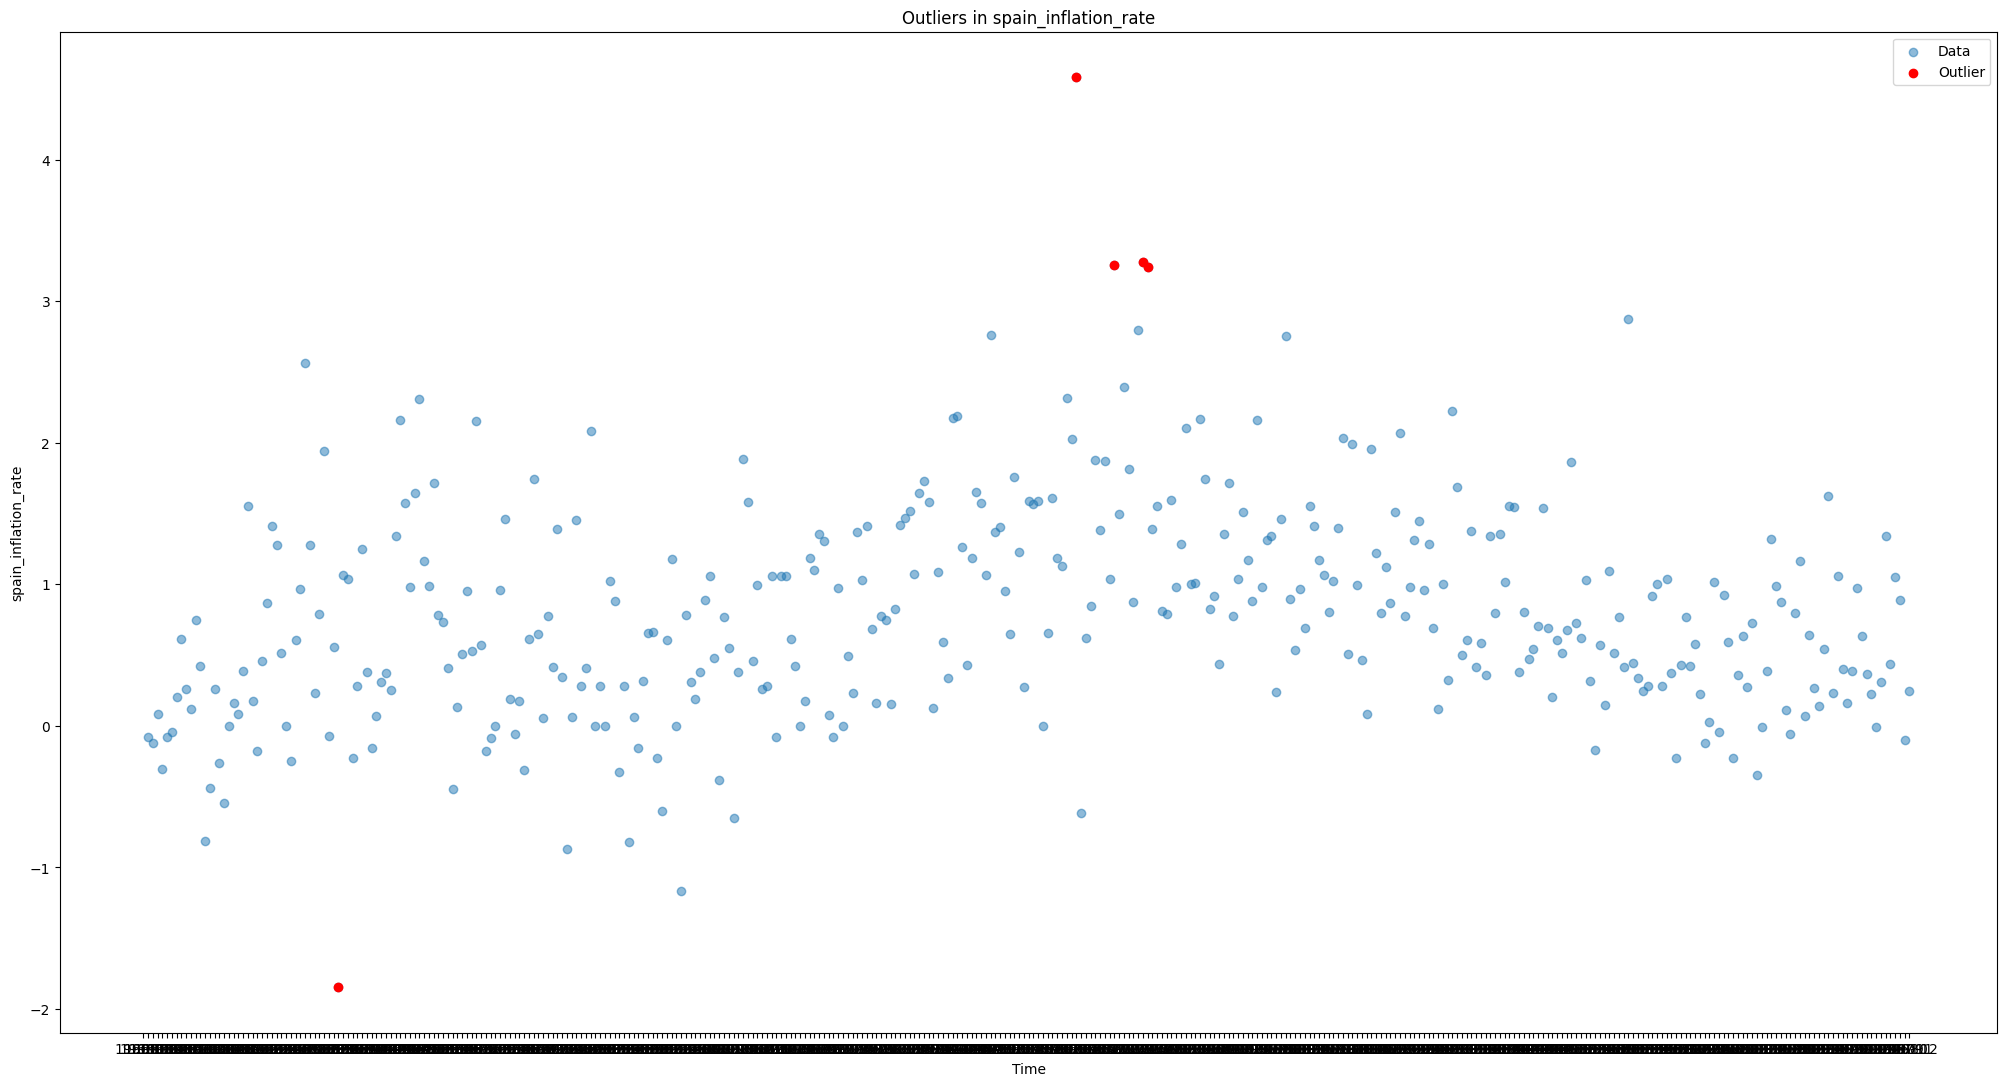

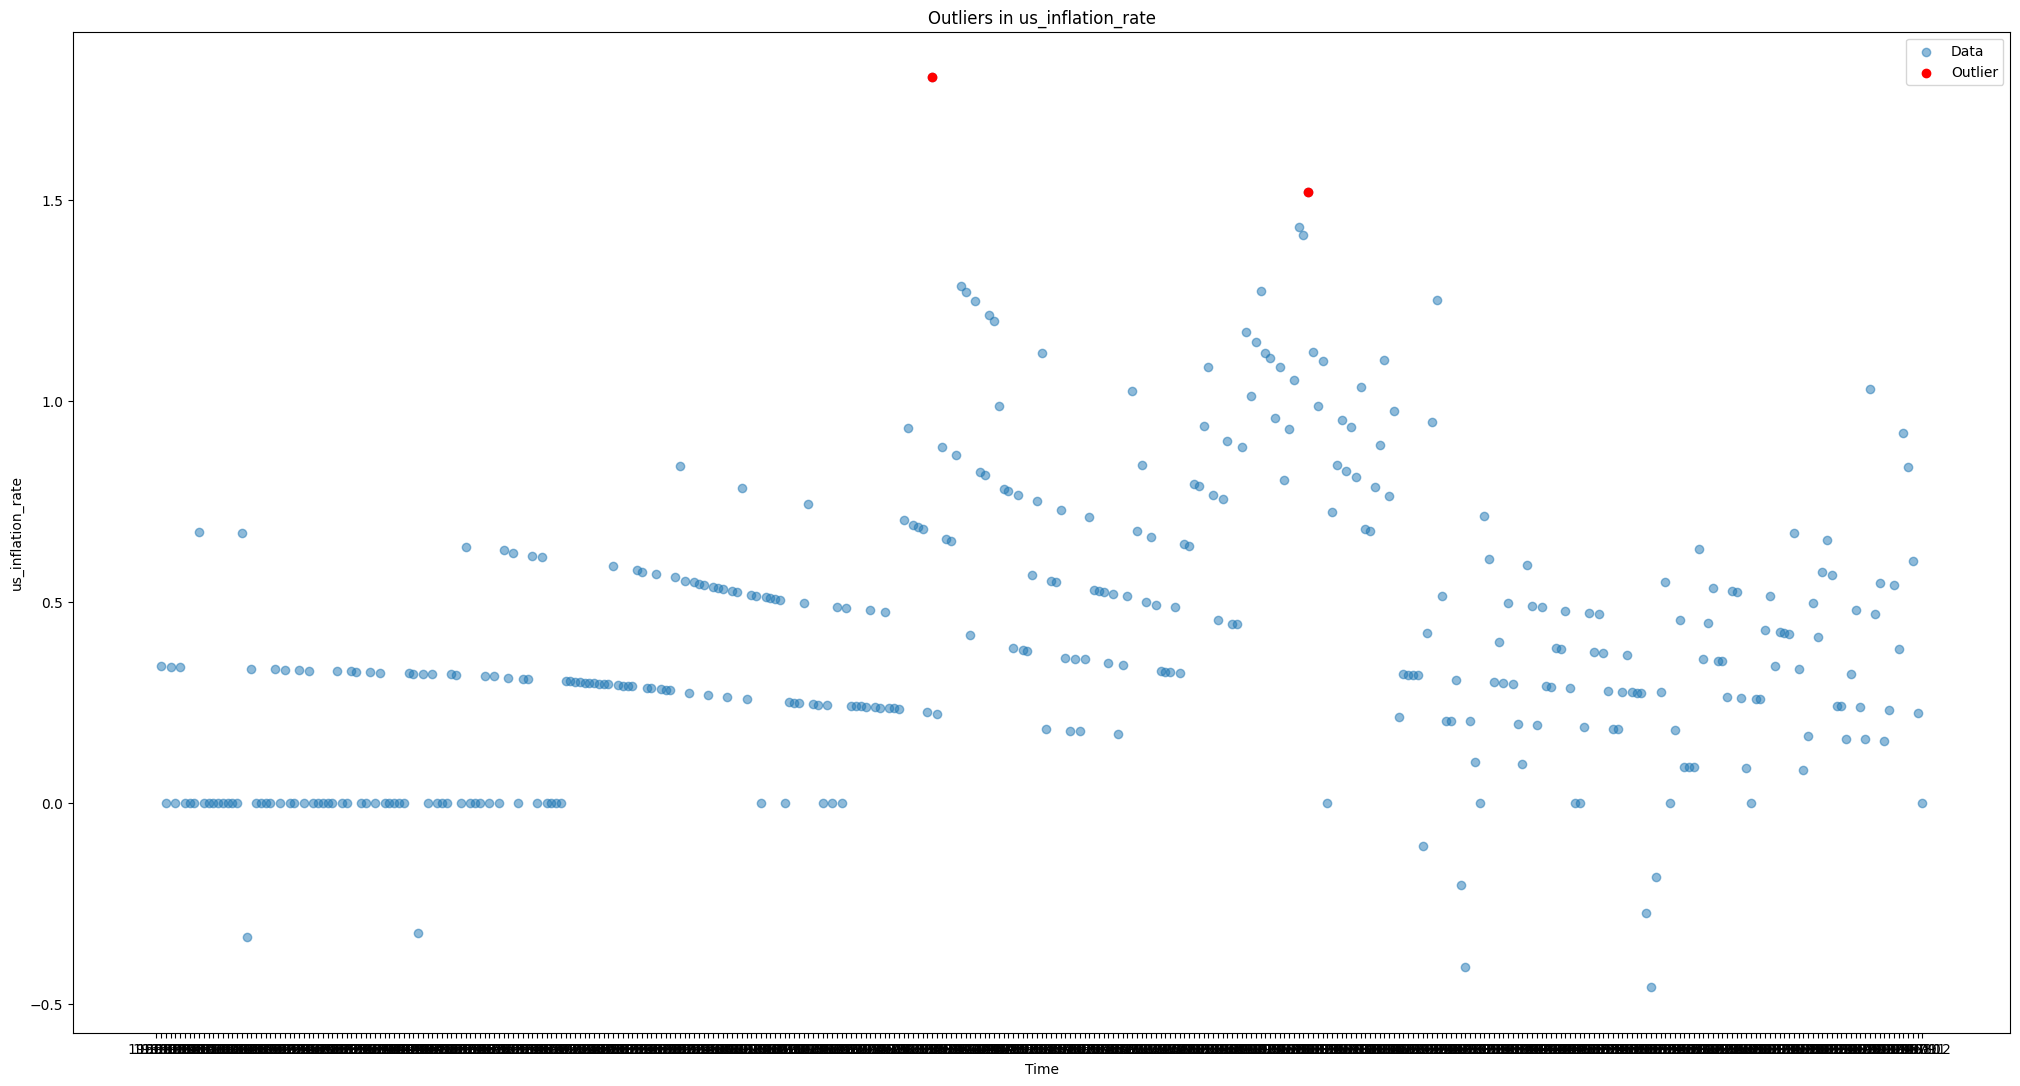

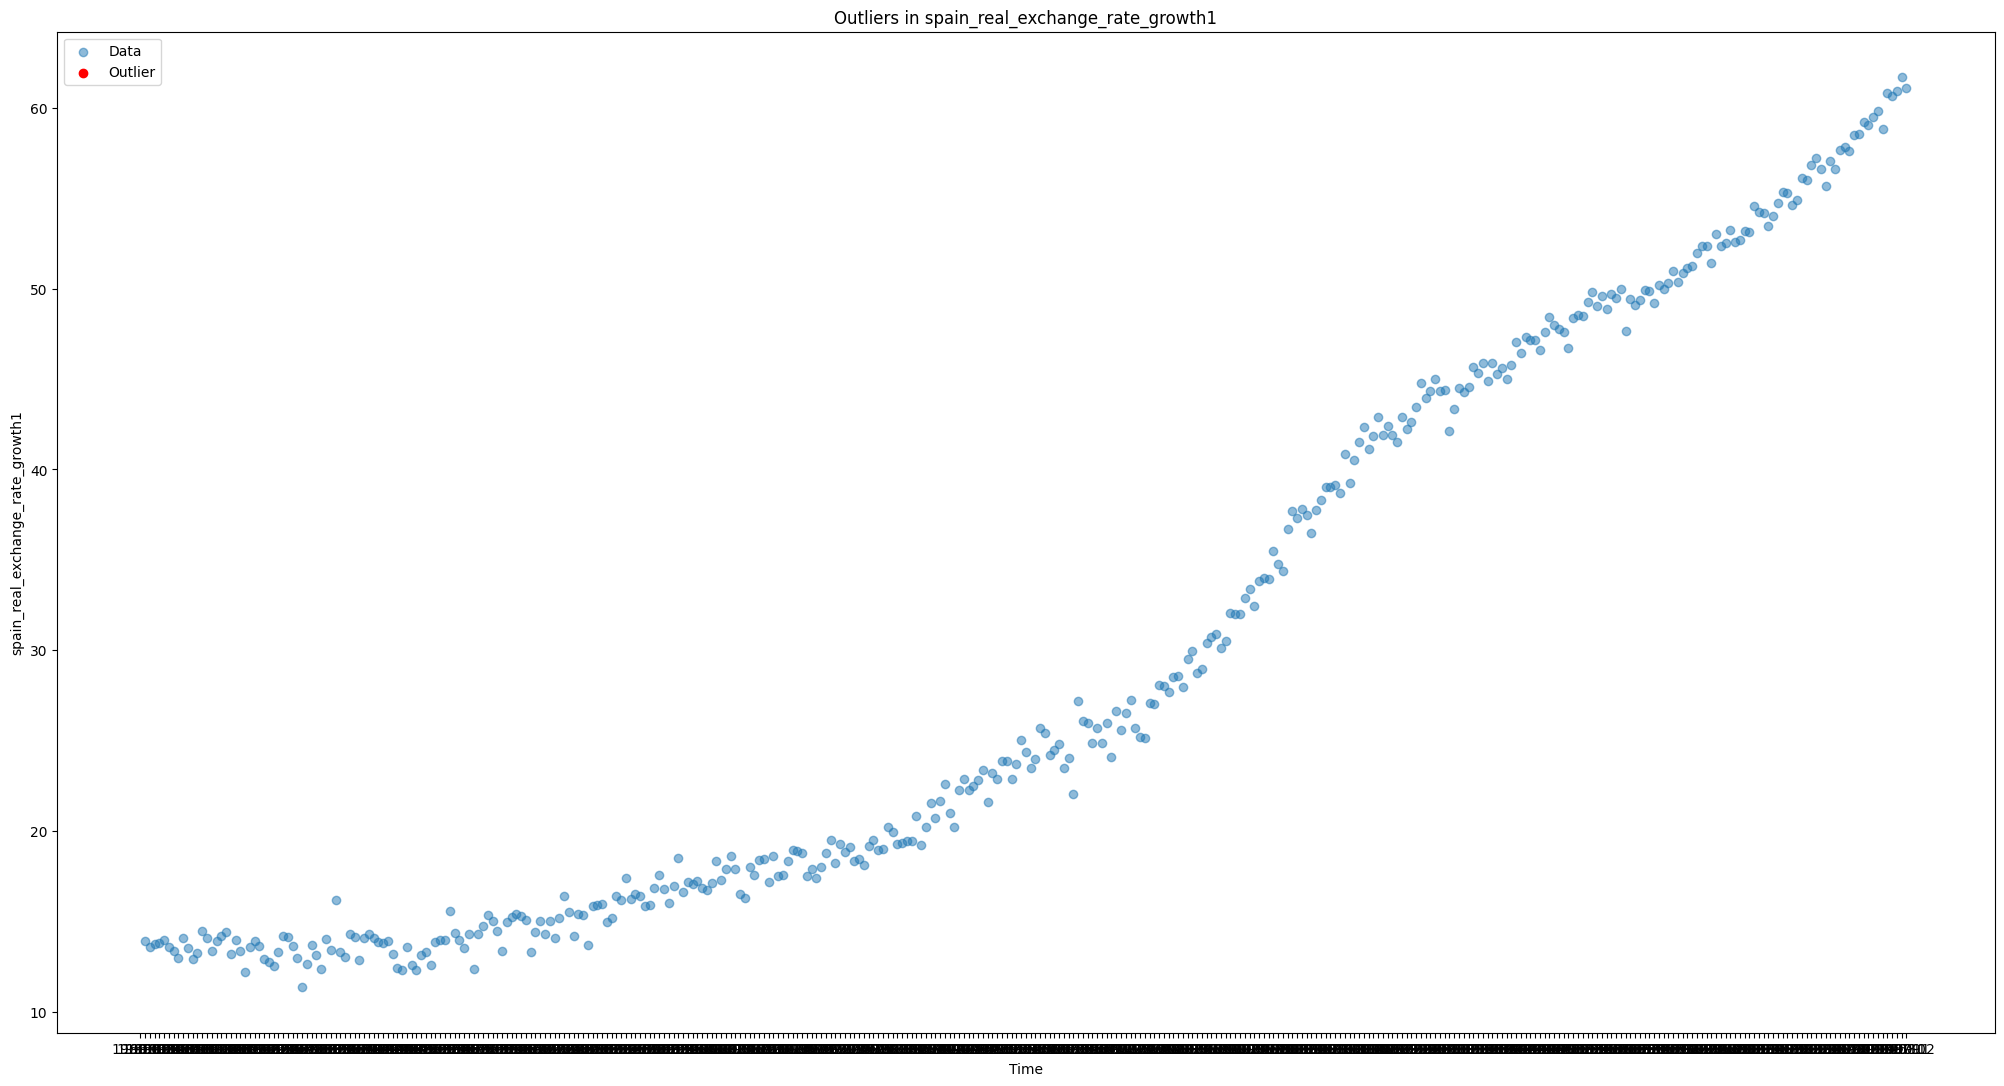

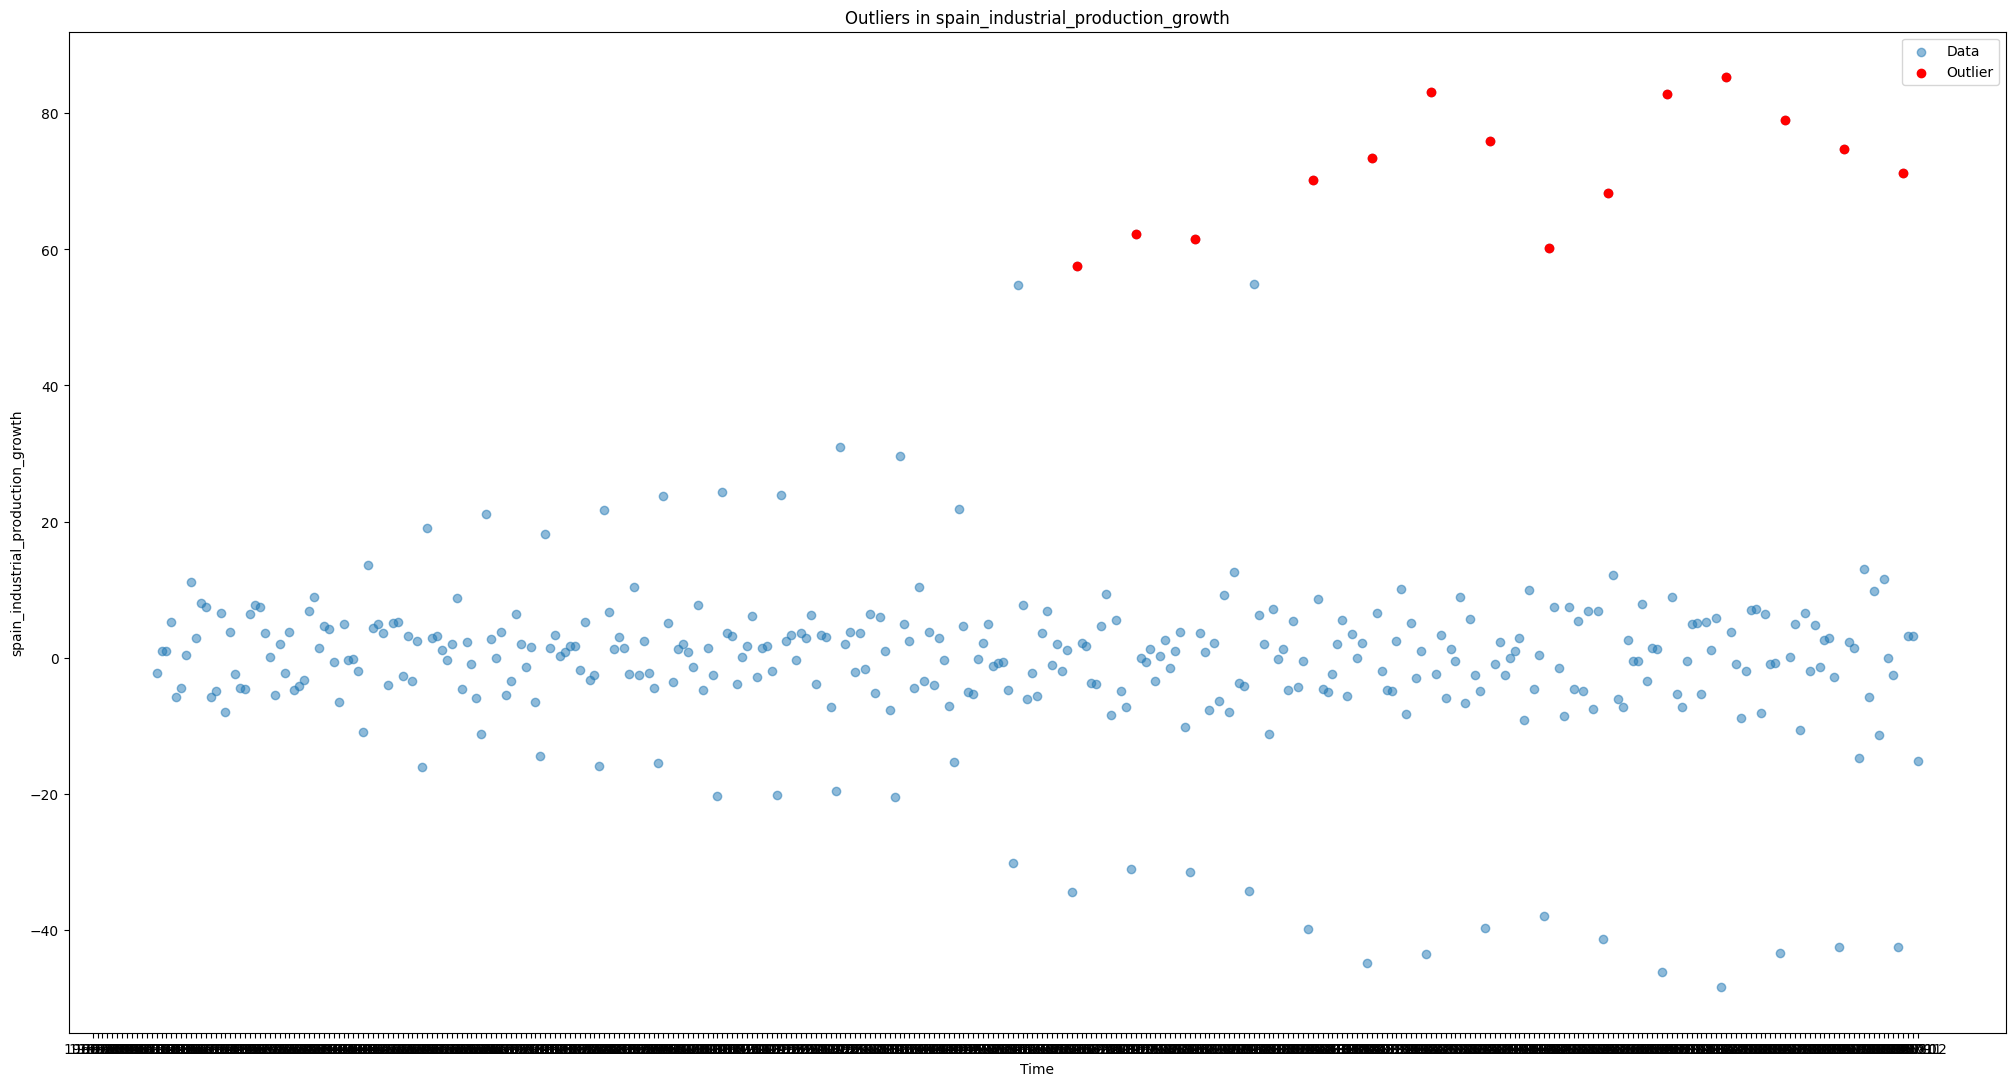

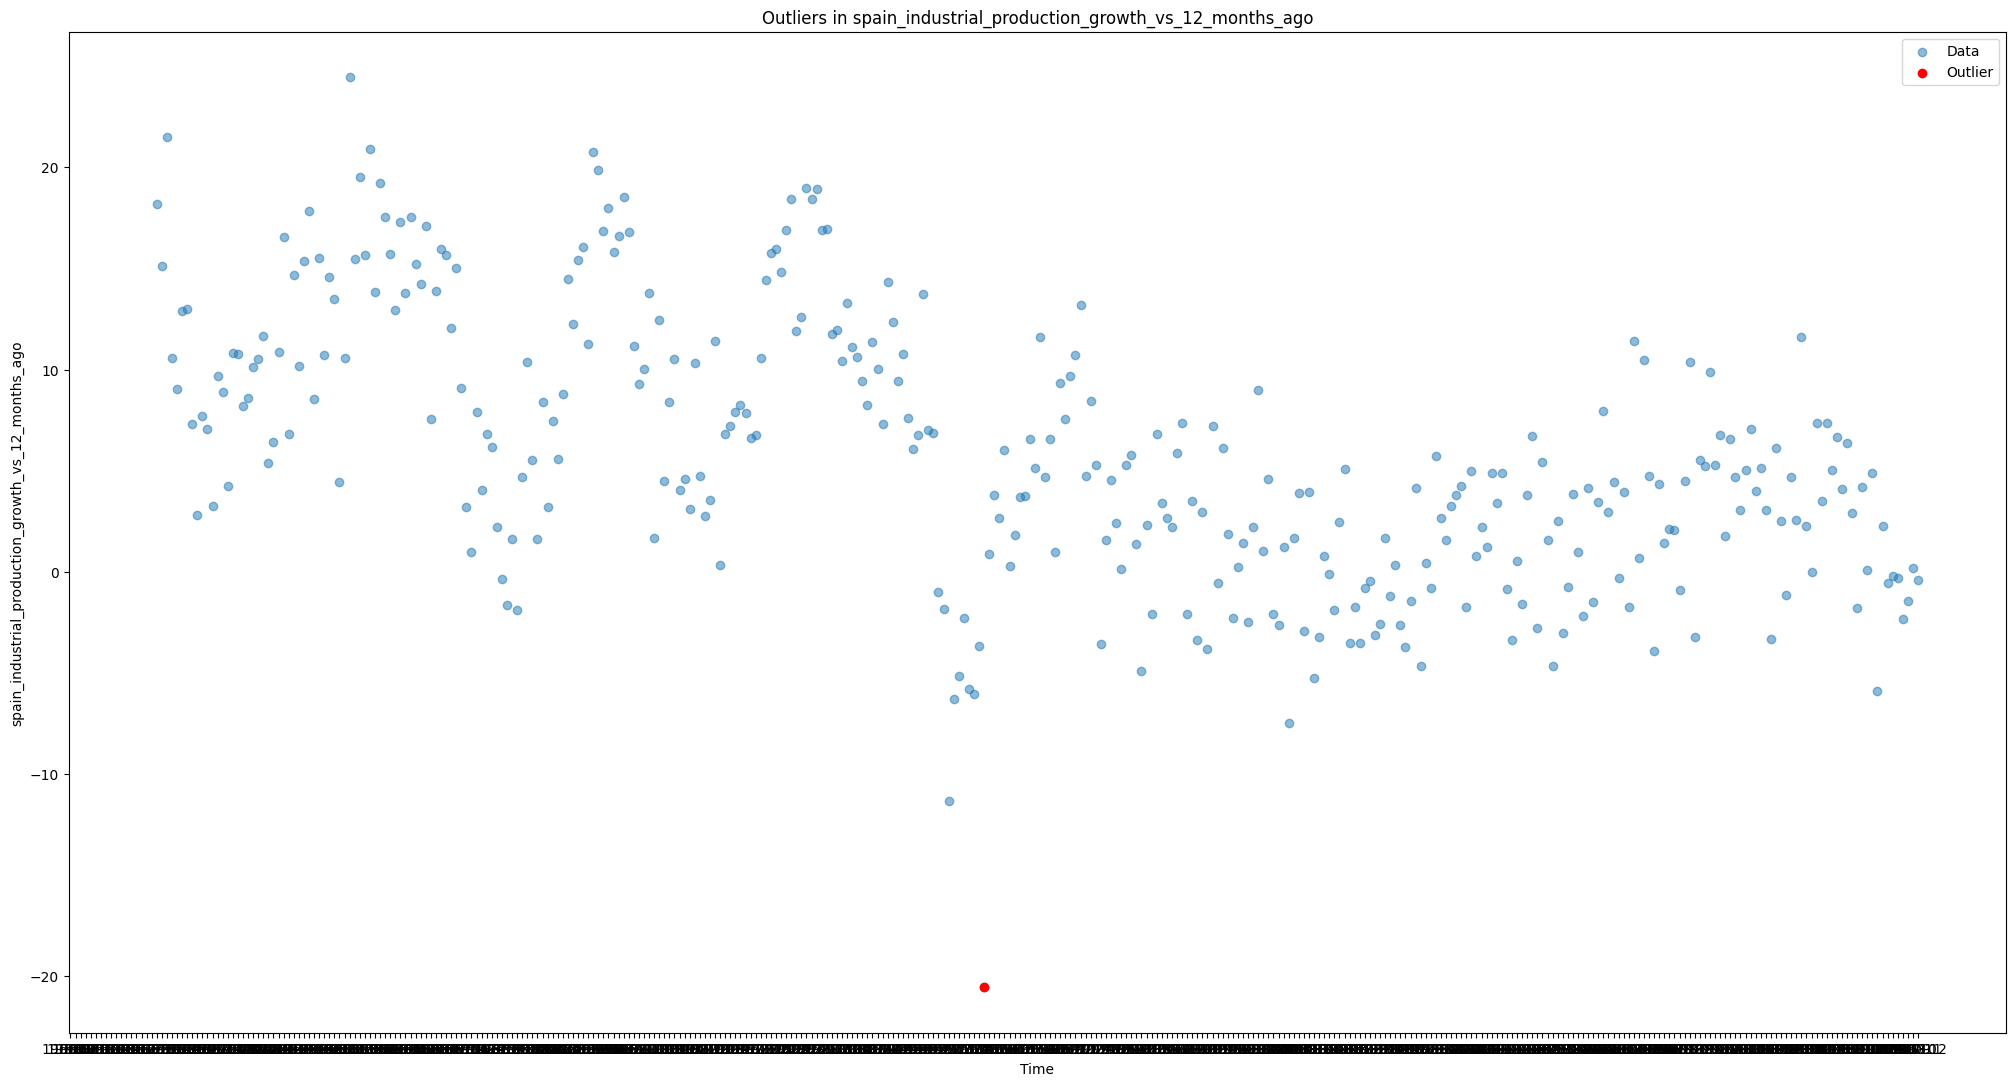

spain_economic_activity  spain_fx spain_reserves  spain_CPI  \
date                                                                  
1960-01                     NaN  0.016667            233   2.857368   
1960-02                     NaN  0.016667            253   2.855049   
1960-03                     NaN  0.016667            299   2.851573   
1960-04                     NaN  0.016667            326   2.853891   
1960-05                     NaN  0.016667            360   2.845198   
1960-06                     NaN  0.016667            406   2.842878   
1960-07                     NaN  0.016667            427   2.841719   
1960-08                     NaN  0.016667            455   2.847516   
1960-09                     NaN  0.016667            479   2.864902   
1960-10                     NaN  0.016667            527   2.872438   
1960-11                     NaN  0.016667            521   2.875915   
1960-12                     NaN  0.016667            541    2.89736   
1961-01               18.681625  0.016667            536   2.909531   
1961-02               18.247714  0.016667            565   2.885768   
1961-03               18.423624  0.016667         561.55   2.873017   
1961-04               18.611261  0.016667          593.5   2.880552   
1961-05               19.584629  0.016667          643.5   2.873017   
1961-06               18.447079  0.016667          683.5   2.857368   
1961-07               17.614439  0.016667          716.5   2.857368   
1961-08               17.684803  0.016667          773.5   2.862005   
1961-09               19.643266  0.016667          795.5   2.864323   
1961-10               20.206177  0.016667          825.5   2.875335   
1961-11               21.836275  0.016667          851.5   2.919963   
1961-12               23.442918  0.016667         886.52    2.92518   
1962-01               22.082549  0.016667          912.5   2.919963   
1962-02               21.003635  0.016667          935.5   2.933294   
1962-03               22.387459  0.016667          958.5   2.958796   
1962-04               20.581452  0.016667          977.5   3.000526   
1962-05               21.355455  0.016667          988.5   3.038779   
1962-06               20.827725  0.016667         1004.5   3.054428   
1962-07               19.901267  0.016667         1031.5   3.054428   
1962-08               18.974808  0.016667         1026.5   3.046893   
1962-09                20.19445  0.016667         1047.5    3.06544   
1962-10               21.765911  0.016667         1046.5   3.094999   
1962-11               23.372555  0.016667         1046.5   3.174403   
1962-12               24.205194  0.016667         1045.5   3.214974   
1963-01               24.216922  0.016667           1062   3.222509   
1963-02                22.86828  0.016667           1062    3.24801   
1963-03               23.337373  0.016667           1038   3.311186   
1963-04               22.809643  0.016667           1039   3.308867   
1963-05                23.65401  0.016667           1035   3.327413   
1963-06               22.539915  0.016667           1032   3.265977   
1963-07               21.613456  0.016667           1054   3.300753   
1963-08               20.898089  0.016667           1106   3.334948   
1963-09               22.317095  0.016667           1119   3.327413   
1963-10               24.299013  0.016667           1107   3.336687   
1963-11               24.627378  0.016667           1106   3.378418   
1963-12               25.753201  0.016667           1147   3.391168   
1964-01               26.843842  0.016667           1183   3.385952   
1964-02               26.656205  0.016667           1187   3.388271   
1964-03               24.932288  0.016667         1210.5   3.398703   
1964-04                26.15193  0.016667         1214.5   3.411454   
1964-05               26.058111  0.016667           1221   3.420147   
1964-06               25.999475  0.016667           1265   3.465935   
1964-07               25.471745 

In [ ]:
# This function takes a DataFrame as input, identifies outliers in each column using the Z-score method,
# and creates a scatter plot with the outliers marked in red. It then prints out a DataFrame for each column
# with a boolean mask indicating which rows contain outliers.

for column in merged_df.columns:
    # Ensure 'date' is set as index if present in merged_df columns
    if 'date' in merged_df.columns:
        merged_df.set_index('date', inplace=True)


def plot_outliers(merged_df):
    data_dict = {}
    for column in merged_df.columns:
        # Skip non-numeric columns and the 'Outlier' column
        # if merged_df[column].dtype == np.number and column != 'Outlier':
        if 1==1:  # Ensuring all columns are processed
            # Calculate the standard deviation and mean
            std = merged_df[column].std()
            mean = merged_df[column].mean()

            # Check if the standard deviation is zero (which means no variation in your data)
            if std == 0:
                print(f"No variation in data for column '{column}'. All values are likely the same.")
                data_dict[column] = {'Outlier': np.full(len(merged_df), False)}
                continue

            # Identify outliers using the Z-score method
            z_scores = np.abs((merged_df[column] - mean) / std)
            outlier_mask = z_scores > 3

            # Create a DataFrame to store the data with outliers
            data_w_outliers = pd.DataFrame()
            data_w_outliers[column] = merged_df[column]
            data_w_outliers['Outlier'] = outlier_mask

            # Plot the scatter plot and mark outliers in red
            plt.figure(figsize=(25, 13))
            plt.scatter(data_w_outliers.index, data_w_outliers[column], alpha=0.5, label='Data')
            plt.scatter(data_w_outliers.loc[data_w_outliers['Outlier']].index,
                        data_w_outliers.loc[data_w_outliers['Outlier'], column],
                        color='red', label='Outlier')
            plt.xlabel('Time')
            plt.ylabel(column)
            plt.title(f'Outliers in {column}')
            plt.legend()
            plt.show()

            # Add the DataFrame to the dictionary
            data_dict[column] = data_w_outliers

    return data_dict

# Call the function and store the output in data_dict
all_data_w_outlier = plot_outliers(merged_df)

display(merged_df.head(372))


In [ ]:


from tabulate import tabulate

def print_outliers(data_dict):
    for column, data_w_outliers in data_dict.items():
        # Check if 'Outlier' is a key in the data_w_outliers dict
        if isinstance(data_w_outliers, dict) and 'Outlier' in data_w_outliers:
            # Convert dict to DataFrame if necessary
            data_w_outliers = pd.DataFrame(data_w_outliers)

        if 'Outlier' in data_w_outliers.columns:
            # Filter the DataFrame for outliers
            outliers = data_w_outliers[data_w_outliers['Outlier']]
            if not outliers.empty:
                # Print the column name
                print(f"\nOutliers for {column}:\n")
                # Create a nicely formatted table using tabulate
                table = tabulate(outliers, headers='keys', tablefmt='pretty')
                print(table)
            else:
                print(f"No outliers found in {column}.")
        else:
            print(f"No 'Outlier' column found in data for {column}.")

# Call the function with the dictionary containing your outlier data
print_outliers(all_data_w_outlier)



No outliers found in spain_economic_activity.
No outliers found in spain_fx.

Outliers for spain_reserves:

+---------+------------------+---------+
|  date   |  spain_reserves  | Outlier |
+---------+------------------+---------+
| 1990-07 | 52775.748641193  |  True   |
| 1990-08 | 53227.7172813327 |  True   |
| 1990-09 | 53790.1877175881 |  True   |
| 1990-10 | 55428.0405768901 |  True   |
| 1990-11 | 56347.8623321777 |  True   |
| 1990-12 | 56004.8359676203 |  True   |
+---------+------------------+---------+
No outliers found in spain_CPI.
No outliers found in us_economic_activity.
No outliers found in us_exchange_rate.

Outliers for us_reserves:

+---------+------------------+---------+
|  date   |   us_reserves    | Outlier |
+---------+------------------+---------+
| 1989-11 | 72559.7516514932 |  True   |
| 1989-12 | 74608.6332693773 |  True   |
| 1990-01 | 75506.361462393  |  True   |
| 1990-02 | 74173.5248679896 |  True   |
| 1990-03 | 76303.0285402087 |  True   |
| 1990-04 | 

In [ ]:
def replace_outliers_with_mean(merged_df):
    for column in merged_df.select_dtypes(include=[np.number]).columns:
        std = merged_df[column].std()
        mean = merged_df[column].mean()

        z_scores = (merged_df[column] - mean) / std
        outliers_mask = np.abs(z_scores) > 3

        # Print out initial outliers for debugging
        print(f"Initial outliers in column {column}:")
        print(merged_df.loc[outliers_mask, column])

        for idx in merged_df.loc[outliers_mask].index:
            # Find the previous and next non-outlier indices
            prev_idx = merged_df.loc[:idx][~outliers_mask].last_valid_index()
            next_idx = merged_df.loc[idx:][~outliers_mask].first_valid_index()

            # Calculate mean of values at previous and next indices if they exist
            if pd.notna(prev_idx) and pd.notna(next_idx) and prev_idx != idx and next_idx != idx:
                mean_val = np.mean([merged_df.at[prev_idx, column], merged_df.at[next_idx, column]])
                merged_df.at[idx, column] = mean_val
                # Print out the value being replaced for debugging
                print(f"Replacing outlier at index {idx} with value {mean_val}")
            # Handle edge cases if no previous or next non-outlier values exist

        # Print out the values after replacement for debugging
        print(f"Values in column {column} after outlier replacement:")
        print(merged_df.loc[outliers_mask, column])

    return merged_df

# Execute the function with your DataFrame
# Note: Replace 'merged_df' with your actual DataFrame variable
# merged_df_replaced_outliers = replace_outliers_with_mean(merged_df)


display(merged_df.head())

# Call the function and replace the outliers in the original dataframe
merged_df = replace_outliers_with_mean(merged_df)

display(merged_df.head(372))



spain_economic_activity  spain_fx spain_reserves spain_CPI  \
date                                                                 
1960-01                     NaN  0.016667            233  2.857368   
1960-02                     NaN  0.016667            253  2.855049   
1960-03                     NaN  0.016667            299  2.851573   
1960-04                     NaN  0.016667            326  2.853891   
1960-05                     NaN  0.016667            360  2.845198   

        us_economic_activity us_exchange_rate us_reserves     us_CPI  \
date                                                                   
1960-01            26.794824                1     21478.1  13.436946   
1960-02             26.94496                1     21395.7  13.482806   
1960-03            26.883139                1     21344.7  13.482806   
1960-04            26.671183                1       21278  13.528666   
1960-05            26.609362                1     21234.3  13.528666   

         spain_nominal_exchange_rate_growth spain_real_exchange_rate_index  \
date                                                                         
1960-01                                 NaN                      13.436946   
1960-02                                 0.0                      13.482806   
1960-03                                 0.0                      13.482806   
1960-04                                 0.0                      13.528666   
1960-05                                 0.0                      13.528666   

         spain_inflation_rate  us_inflation_rate  \
date                                               
1960-01                   NaN                NaN   
1960-02             -0.081128           0.341297   
1960-03             -0.121770           0.000000   
1960-04              0.081292           0.340136   
1960-05             -0.304609           0.000000   

        spain_real_exchange_rate_growth1  spain_industrial_production_growth  \
date                                                                           
1960-01                              NaN                                 NaN   
1960-02                        13.905231                                 NaN   
1960-03                        13.604576                                 NaN   
1960-04                        13.787509                                 NaN   
1960-05                        13.833275                                 NaN   

        spain_industrial_production_growth_vs_12_months_ago  
date                                                         
1960-01                                                NaN   
1960-02                                                NaN   
1960-03                                                NaN   
1960-04                                                NaN   
1960-05                                                NaN

Initial outliers in column spain_nominal_exchange_rate_growth:
date
1967-11   -14.285714
1976-02    -7.788056
1977-07   -13.923249
1985-04     6.544729
1989-07     6.477437
Name: spain_nominal_exchange_rate_growth, dtype: float64
Replacing outlier at index 1967-11 with value 0.0
Replacing outlier at index 1976-02 with value -1.68592924947496
Replacing outlier at index 1977-07 with value -2.6980231744498373
Replacing outlier at index 1985-04 with value -1.3333342658271075
Replacing outlier at index 1989-07 with value -2.5177954514885856
Values in column spain_nominal_exchange_rate_growth after outlier replacement:
date
1967-11    0.000000
1976-02   -1.685929
1977-07   -2.698023
1985-04   -1.333334
1989-07   -2.517795
Name: spain_nominal_exchange_rate_growth, dtype: float64
Initial outliers in column spain_inflation_rate:
date
1963-06   -1.846368
1976-05    4.582095
1977-01    3.257266
1977-07    3.278716
1977-08    3.243424
Name: spain_inflation_rate, dtype: float64
Replacing outlier at

<ipython-input-50-3ca6df6e6bd8>:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  prev_idx = merged_df.loc[:idx][~outliers_mask].last_valid_index()
<ipython-input-50-3ca6df6e6bd8>:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  next_idx = merged_df.loc[idx:][~outliers_mask].first_valid_index()


spain_economic_activity  spain_fx spain_reserves  spain_CPI  \
date                                                                  
1960-01                     NaN  0.016667            233   2.857368   
1960-02                     NaN  0.016667            253   2.855049   
1960-03                     NaN  0.016667            299   2.851573   
1960-04                     NaN  0.016667            326   2.853891   
1960-05                     NaN  0.016667            360   2.845198   
1960-06                     NaN  0.016667            406   2.842878   
1960-07                     NaN  0.016667            427   2.841719   
1960-08                     NaN  0.016667            455   2.847516   
1960-09                     NaN  0.016667            479   2.864902   
1960-10                     NaN  0.016667            527   2.872438   
1960-11                     NaN  0.016667            521   2.875915   
1960-12                     NaN  0.016667            541    2.89736   
1961-01               18.681625  0.016667            536   2.909531   
1961-02               18.247714  0.016667            565   2.885768   
1961-03               18.423624  0.016667         561.55   2.873017   
1961-04               18.611261  0.016667          593.5   2.880552   
1961-05               19.584629  0.016667          643.5   2.873017   
1961-06               18.447079  0.016667          683.5   2.857368   
1961-07               17.614439  0.016667          716.5   2.857368   
1961-08               17.684803  0.016667          773.5   2.862005   
1961-09               19.643266  0.016667          795.5   2.864323   
1961-10               20.206177  0.016667          825.5   2.875335   
1961-11               21.836275  0.016667          851.5   2.919963   
1961-12               23.442918  0.016667         886.52    2.92518   
1962-01               22.082549  0.016667          912.5   2.919963   
1962-02               21.003635  0.016667          935.5   2.933294   
1962-03               22.387459  0.016667          958.5   2.958796   
1962-04               20.581452  0.016667          977.5   3.000526   
1962-05               21.355455  0.016667          988.5   3.038779   
1962-06               20.827725  0.016667         1004.5   3.054428   
1962-07               19.901267  0.016667         1031.5   3.054428   
1962-08               18.974808  0.016667         1026.5   3.046893   
1962-09                20.19445  0.016667         1047.5    3.06544   
1962-10               21.765911  0.016667         1046.5   3.094999   
1962-11               23.372555  0.016667         1046.5   3.174403   
1962-12               24.205194  0.016667         1045.5   3.214974   
1963-01               24.216922  0.016667           1062   3.222509   
1963-02                22.86828  0.016667           1062    3.24801   
1963-03               23.337373  0.016667           1038   3.311186   
1963-04               22.809643  0.016667           1039   3.308867   
1963-05                23.65401  0.016667           1035   3.327413   
1963-06               22.539915  0.016667           1032   3.265977   
1963-07               21.613456  0.016667           1054   3.300753   
1963-08               20.898089  0.016667           1106   3.334948   
1963-09               22.317095  0.016667           1119   3.327413   
1963-10               24.299013  0.016667           1107   3.336687   
1963-11               24.627378  0.016667           1106   3.378418   
1963-12               25.753201  0.016667           1147   3.391168   
1964-01               26.843842  0.016667           1183   3.385952   
1964-02               26.656205  0.016667           1187   3.388271   
1964-03               24.932288  0.016667         1210.5   3.398703   
1964-04                26.15193  0.016667         1214.5   3.411454   
1964-05               26.058111  0.016667           1221   3.420147   
1964-06               25.999475  0.016667           1265   3.465935   
1964-07               25.471745 

5.3.1 Exchange Rate and International Reserve Graphs


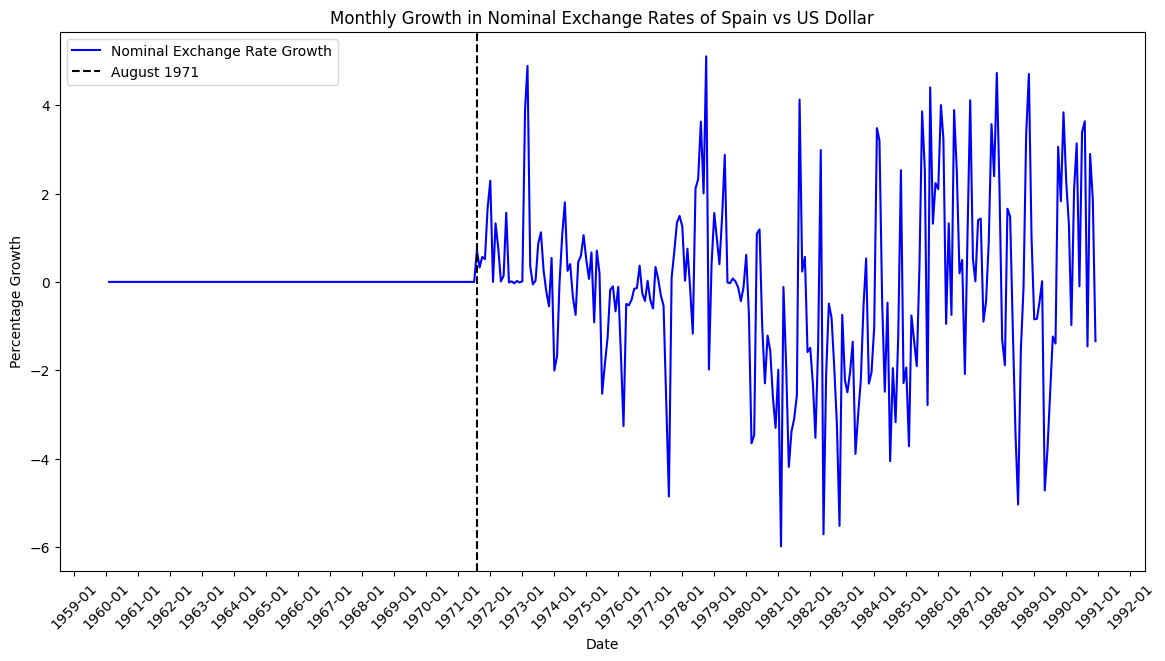

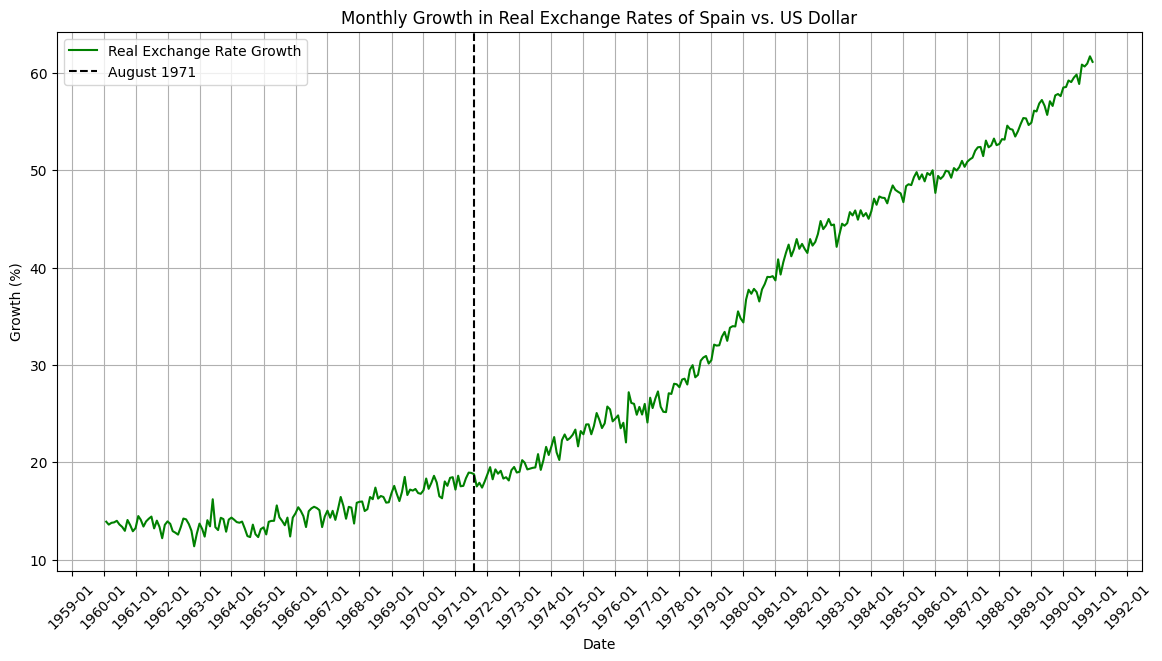

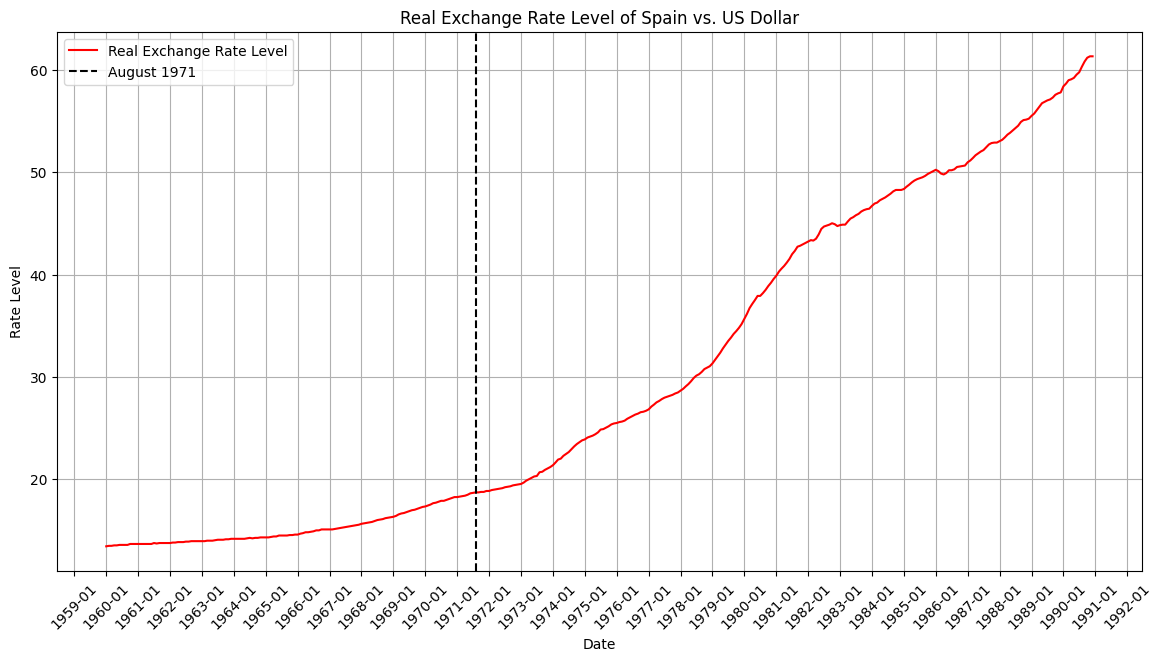

In [ ]:
merged_df.index = pd.to_datetime(merged_df.index)

import matplotlib.dates as mdates  # Importing matplotlib.dates

# Assuming 'merged_df' is your DataFrame and it's properly prepared for plotting

plt.figure(figsize=(14, 7))
plt.plot(merged_df.index, merged_df['spain_nominal_exchange_rate_growth'], label='Nominal Exchange Rate Growth', color='blue')

# Find the index corresponding to August 1971
highlight_date = '1971-08-01'  # Date format: YYYY-MM-DD
highlight_index = merged_df.index.get_loc(highlight_date)
# Plot a vertical line at the index of August 1971
plt.axvline(x=merged_df.index[highlight_index], color='black', linestyle='--', label='August 1971')

plt.title('Monthly Growth in Nominal Exchange Rates of Spain vs US Dollar')
plt.xlabel('Date')
plt.ylabel('Percentage Growth')
plt.legend()
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Formats the x-axis labels as 'Year-Month'
plt.gca().xaxis.set_major_locator(mdates.YearLocator())  # Locates one tick per year
plt.xticks(rotation=45)  # Rotates x-axis labels for better readability
plt.show()

# Plot Monthly Growth in Real Exchange Rates of Spain vs. the US Dollar
plt.figure(figsize=(14, 7))
plt.plot(merged_df.index, merged_df['spain_real_exchange_rate_growth1'], label='Real Exchange Rate Growth', color='green')

# Find the index corresponding to August 1971
highlight_date = '1971-08-01'  # Date format: YYYY-MM-DD
highlight_index = merged_df.index.get_loc(highlight_date)
# Plot a vertical line at the index of August 1971
plt.axvline(x=merged_df.index[highlight_index], color='black', linestyle='--', label='August 1971')

plt.title('Monthly Growth in Real Exchange Rates of Spain vs. US Dollar')
plt.xlabel('Date')
plt.ylabel('Growth (%)')
plt.legend()
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Plot Real Exchange Rate Level of Spain vs. the US Dollar
plt.figure(figsize=(14, 7))
plt.plot(merged_df.index, merged_df['spain_real_exchange_rate_index'], label='Real Exchange Rate Level', color='red')

# Find the index corresponding to August 1971
highlight_date = '1971-08-01'  # Date format: YYYY-MM-DD
highlight_index = merged_df.index.get_loc(highlight_date)
# Plot a vertical line at the index of August 1971
plt.axvline(x=merged_df.index[highlight_index], color='black', linestyle='--', label='August 1971')

plt.title('Real Exchange Rate Level of Spain vs. US Dollar')
plt.xlabel('Date')
plt.ylabel('Rate Level')
plt.legend()
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Plot a time series graph of the monthly indexed value of international reserves of your country
and the US from January 1960 until the exit of the US from Bretton Woods.

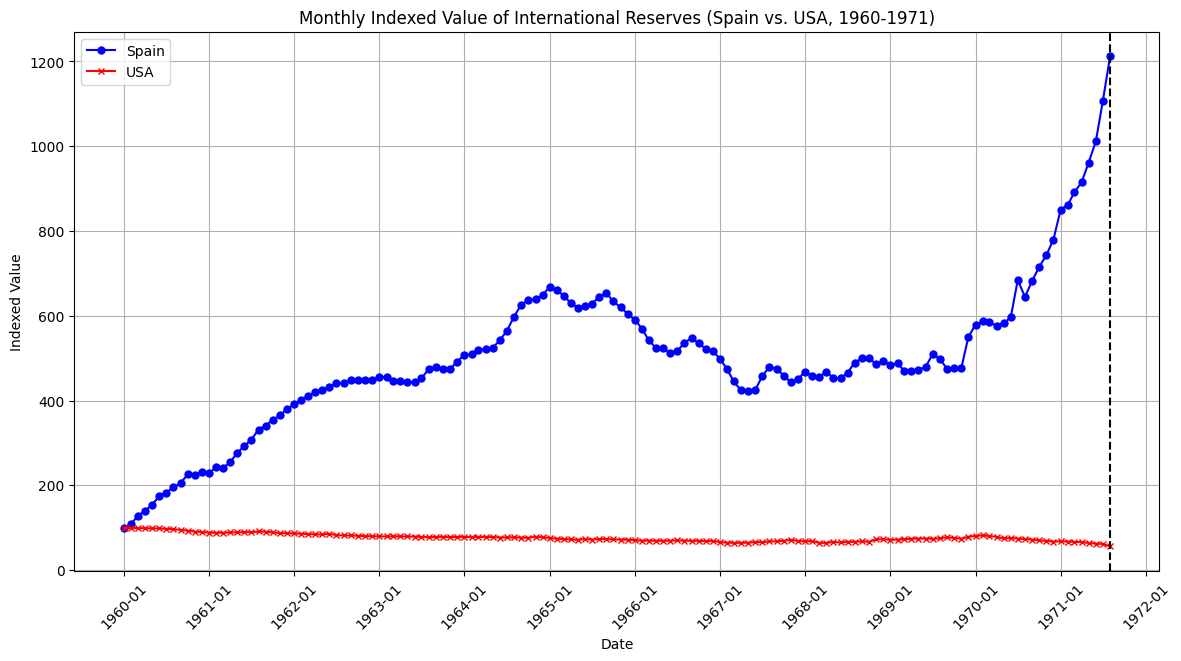

In [ ]:
# Ensure the index is in datetime format for easy comparison
merged_df.index = pd.to_datetime(merged_df.index)

# Check and potentially add 'spain_reserves_index' column
if 'spain_reserves_index' not in merged_df.columns:
    # Placeholder operation: Adjust this calculation as needed for 'spain_reserves_index'
    merged_df['spain_reserves_index'] = merged_df['spain_reserves'] / merged_df['spain_reserves'].iloc[0] * 100

# Check and potentially add 'us_reserves_index' column
if 'us_reserves_index' not in merged_df.columns:
    # Placeholder operation: Adjust this calculation as needed for 'us_reserves_index'
    merged_df['us_reserves_index'] = merged_df['us_reserves'] / merged_df['us_reserves'].iloc[0] * 100

# Filter data from January 1960 to August 1971 (US exit from Bretton Woods)
start_date = "1960-01"
end_date = "1971-08"
filtered_df = merged_df[start_date:end_date]

# Plotting the monthly indexed value of international reserves
plt.figure(figsize=(14, 7))
plt.plot(filtered_df.index, filtered_df['spain_reserves_index'], label='Spain', color='blue', marker='o', linestyle='-', markersize=5)
plt.plot(filtered_df.index, filtered_df['us_reserves_index'], label='USA', color='red', marker='x', linestyle='-', markersize=5)

plt.title('Monthly Indexed Value of International Reserves (Spain vs. USA, 1960-1971)')
plt.xlabel('Date')
plt.ylabel('Indexed Value')
plt.legend()

# Find the index corresponding to August 1971
highlight_date = '1971-08-01'  # Date format: YYYY-MM-DD
highlight_index = merged_df.index.get_loc(highlight_date)
# Plot a vertical line at the index of August 1971
plt.axvline(x=merged_df.index[highlight_index], color='black', linestyle='--', label='August 1971')

# Formatting the date on the x-axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.xticks(rotation=45)
plt.grid(True)

plt.show()

5.3.2 Inflation and Industrial Production Graphs • Plot a time series graph of monthly inflation. • Plot a time series graph of the monthly growth in industrial production. • Plot a time series graph of the growth in industrial production versus 12 months ago. • Why are your results for the monthly versus 12 monthly growth in industrial production so different? Which measure is more useful?

Plot a Time Series Graph of Monthly Inflation

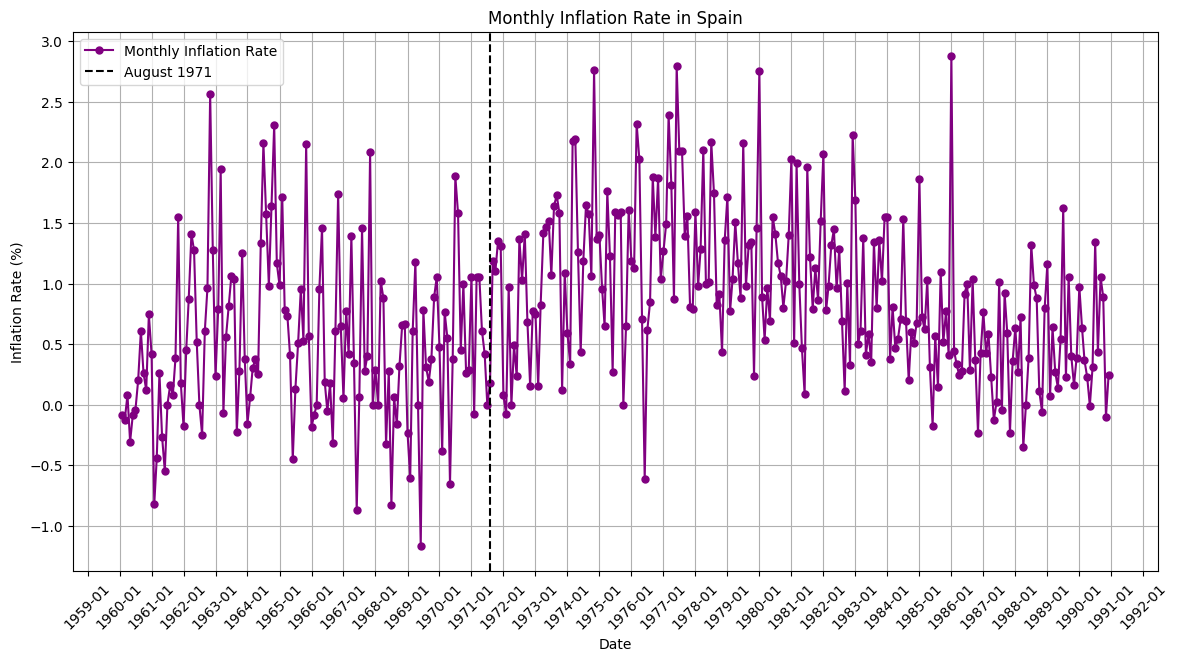

In [ ]:
# Set the size of the figure for the plot
plt.figure(figsize=(14, 7))

start_date = "1960-01"
end_date = "1990-12"
filtered_df = merged_df[start_date:end_date]

# Plot the data with specified x and y values along with additional parameters for style
plt.plot(filtered_df.index, filtered_df['spain_inflation_rate'], label='Monthly Inflation Rate', color='purple', marker='o', linestyle='-', markersize=5)

# Find the index corresponding to August 1971
highlight_date = '1971-08-01'  # Date format: YYYY-MM-DD
highlight_index = merged_df.index.get_loc(highlight_date)
# Plot a vertical line at the index of August 1971
plt.axvline(x=merged_df.index[highlight_index], color='black', linestyle='--', label='August 1971')

# Set the title of the plot
plt.title('Monthly Inflation Rate in Spain')

# Set the label for the x-axis
plt.xlabel('Date')

# Set the label for the y-axis
plt.ylabel('Inflation Rate (%)')

# Display the legend for the plot
plt.legend()

# Format the x-axis to display dates as 'YYYY-MM' using DateFormatter
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Set the major locator for the x-axis to display ticks at each year
plt.gca().xaxis.set_major_locator(mdates.YearLocator())

# Rotate the x-axis labels by 45 degrees for better readability
plt.xticks(rotation=45)

# Enable grid lines on the plot
plt.grid(True)

# Display the plot
plt.show()


2. Plot a Time Series Graph of the Monthly Growth in Industrial Production


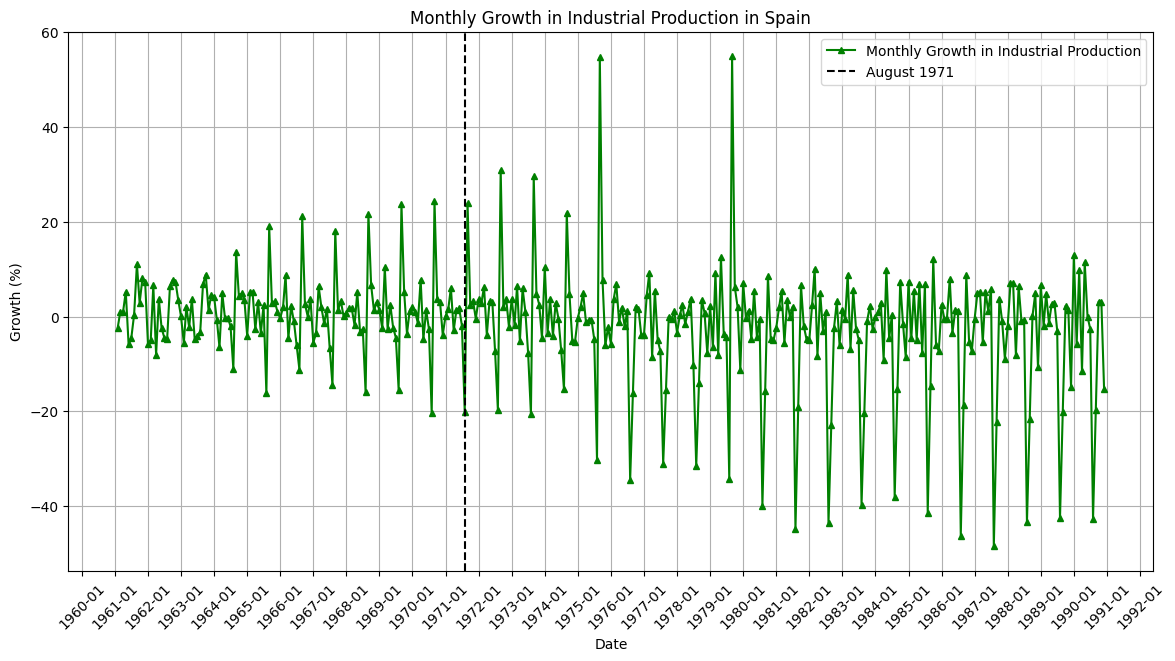

In [ ]:
# Set the size of the figure for the plot
plt.figure(figsize=(14, 7))

start_date = "1960-01"
end_date = "1990-12"
filtered_df = merged_df[start_date:end_date]

# Plot the data with specified x and y values along with additional parameters for style
plt.plot(filtered_df.index, filtered_df['spain_industrial_production_growth'], label='Monthly Growth in Industrial Production', color='green', marker='^', linestyle='-', markersize=5)

# Find the index corresponding to August 1971
highlight_date = '1971-08-01'  # Date format: YYYY-MM-DD
highlight_index = merged_df.index.get_loc(highlight_date)
# Plot a vertical line at the index of August 1971
plt.axvline(x=merged_df.index[highlight_index], color='black', linestyle='--', label='August 1971')

# Set the title of the plot
plt.title('Monthly Growth in Industrial Production in Spain')

# Set the label for the x-axis
plt.xlabel('Date')

# Set the label for the y-axis
plt.ylabel('Growth (%)')

# Display the legend for the plot
plt.legend()

# Format the x-axis to display dates as 'YYYY-MM' using DateFormatter
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Set the major locator for the x-axis to display ticks at each year
plt.gca().xaxis.set_major_locator(mdates.YearLocator())

# Rotate the x-axis labels by 45 degrees for better readability
plt.xticks(rotation=45)

# Enable grid lines on the plot
plt.grid(True)

# Display the plot
plt.show()


3. Plot a Time Series Graph of the Growth in Industrial Production Versus 12 Months Ago


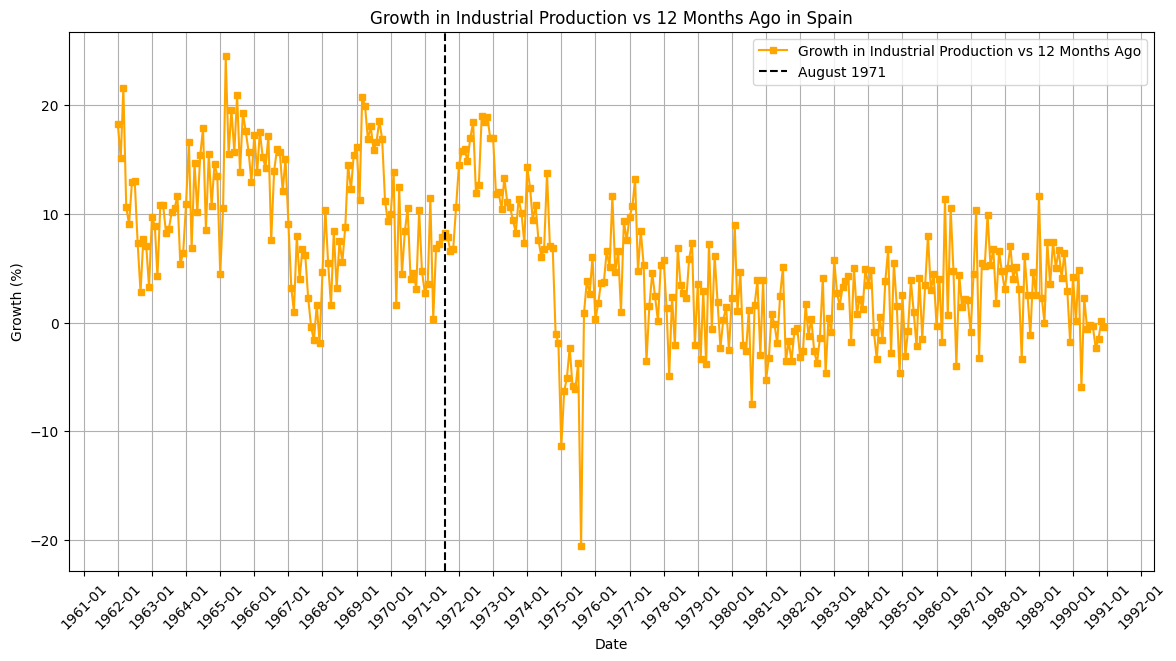

In [ ]:
# Set the size of the figure for the plot
plt.figure(figsize=(14, 7))

start_date = "1960-01"
end_date = "1990-12"
filtered_df = merged_df[start_date:end_date]

# Plot the data with specified x and y values along with additional parameters for style
plt.plot(filtered_df.index, filtered_df['spain_industrial_production_growth_vs_12_months_ago'], label='Growth in Industrial Production vs 12 Months Ago', color='orange', marker='s', linestyle='-', markersize=5)

# Find the index corresponding to August 1971
highlight_date = '1971-08-01'  # Date format: YYYY-MM-DD
highlight_index = merged_df.index.get_loc(highlight_date)
# Plot a vertical line at the index of August 1971
plt.axvline(x=merged_df.index[highlight_index], color='black', linestyle='--', label='August 1971')

# Set the title of the plot
plt.title('Growth in Industrial Production vs 12 Months Ago in Spain')

# Set the label for the x-axis
plt.xlabel('Date')

# Set the label for the y-axis
plt.ylabel('Growth (%)')

# Display the legend for the plot
plt.legend()

# Format the x-axis to display dates as 'YYYY-MM' using DateFormatter
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Set the major locator for the x-axis to display ticks at each year
plt.gca().xaxis.set_major_locator(mdates.YearLocator())

# Rotate the x-axis labels by 45 degrees for better readability
plt.xticks(rotation=45)

# Enable grid lines on the plot
plt.grid(True)

# Display the plot
plt.show()


5.3.3 Comparison Statistics • Separately for both the period before and after Bretton Woods, calculate the standard deviation of: – The monthly growth of nominal exchange rates versus the US dollar. – The monthly growth of real exchange rates versus the US dollar. – The inflation rate in your country. – The difference between the inflation in your country versus the United States. – The 12-monthly industrial production growth. • When you calculate the standard deviation of variables before Bretton Woods, include data up to 07/1971. When you calculate the standard deviation of variables after Bretton Woods, only include data from 01/1973. • Report these numbers in a suitably formatted table, as well as the ratio of the standard deviation of each variable before and after Bretton Woods.

In [ ]:
# Assuming 'merged_df' is already set with 'date' as a datetime index
# Separate the periods
before_bw = merged_df[:'1971-07']
after_bw = merged_df['1973-01':]

# Calculate standard deviations
std_devs = {
    'Variable': ['Nominal Exchange Rate Growth', 'Real Exchange Rate Growth', 'Inflation Rate', 'Inflation Rate Difference', '12-Monthly Industrial Production Growth'],
    'Before BW': [
        before_bw['spain_nominal_exchange_rate_growth'].std(),
        before_bw['spain_real_exchange_rate_growth1'].std(),
        before_bw['spain_inflation_rate'].std(),
        (before_bw['spain_inflation_rate'] - before_bw['us_inflation_rate']).std(),
        before_bw['spain_industrial_production_growth_vs_12_months_ago'].std(),
    ],
    'After BW': [
        after_bw['spain_nominal_exchange_rate_growth'].std(),
        after_bw['spain_real_exchange_rate_growth1'].std(),
        after_bw['spain_inflation_rate'].std(),
        (after_bw['spain_inflation_rate'] - after_bw['us_inflation_rate']).std(),
        after_bw['spain_industrial_production_growth_vs_12_months_ago'].std(),
    ]
}

# Add the ratio column
std_devs['Ratio After/Before BW'] = [after/before if before else None for before, after in zip(std_devs['Before BW'], std_devs['After BW'])]

# Convert to DataFrame for better display
std_devs_df = pd.DataFrame(std_devs)



from tabulate import tabulate

# Assuming 'std_devs_df' is the DataFrame created in the previous step

# Enhancing the DataFrame for display
# Setting 'Variable' as the index for a cleaner look
std_devs_df.set_index('Variable', inplace=True)

# Formatting the DataFrame using 'tabulate' for better appearance
table = tabulate(std_devs_df, headers='keys', tablefmt='fancy_grid', floatfmt=".2f")

print(table)


# Extract the 'Ratio After/Before BW' column for a focused display
ratios_df = std_devs_df[['Ratio After/Before BW']]

# Use 'tabulate' to format this specific column with enhanced readability
ratio_table = tabulate(ratios_df, headers='keys', tablefmt='fancy_grid', numalign="right", floatfmt=".2f")

print("Ratio of Standard Deviation After/Before Bretton Woods")
print(ratio_table)

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
display(merged_df)


╒═════════════════════════════════════════╤═════════════╤════════════╤═════════════════════════╕
│ Variable                                │   Before BW │   After BW │   Ratio After/Before BW │
╞═════════════════════════════════════════╪═════════════╪════════════╪═════════════════════════╡
│ Nominal Exchange Rate Growth            │        0.00 │       2.19 │                  nan    │
├─────────────────────────────────────────┼─────────────┼────────────┼─────────────────────────┤
│ Real Exchange Rate Growth               │        1.80 │      12.61 │                    7.02 │
├─────────────────────────────────────────┼─────────────┼────────────┼─────────────────────────┤
│ Inflation Rate                          │        0.70 │       0.65 │                    0.94 │
├─────────────────────────────────────────┼─────────────┼────────────┼─────────────────────────┤
│ Inflation Rate Difference               │        0.76 │       0.67 │                    0.88 │
├─────────────────────────────

spain_economic_activity  spain_fx spain_reserves  spain_CPI  \
date                                                                     
1960-01-01                     NaN  0.016667            233   2.857368   
1960-02-01                     NaN  0.016667            253   2.855049   
1960-03-01                     NaN  0.016667            299   2.851573   
1960-04-01                     NaN  0.016667            326   2.853891   
1960-05-01                     NaN  0.016667            360   2.845198   
1960-06-01                     NaN  0.016667            406   2.842878   
1960-07-01                     NaN  0.016667            427   2.841719   
1960-08-01                     NaN  0.016667            455   2.847516   
1960-09-01                     NaN  0.016667            479   2.864902   
1960-10-01                     NaN  0.016667            527   2.872438   
1960-11-01                     NaN  0.016667            521   2.875915   
1960-12-01                     NaN  0.016667            541    2.89736   
1961-01-01               18.681625  0.016667            536   2.909531   
1961-02-01               18.247714  0.016667            565   2.885768   
1961-03-01               18.423624  0.016667         561.55   2.873017   
1961-04-01               18.611261  0.016667          593.5   2.880552   
1961-05-01               19.584629  0.016667          643.5   2.873017   
1961-06-01               18.447079  0.016667          683.5   2.857368   
1961-07-01               17.614439  0.016667          716.5   2.857368   
1961-08-01               17.684803  0.016667          773.5   2.862005   
1961-09-01               19.643266  0.016667          795.5   2.864323   
1961-10-01               20.206177  0.016667          825.5   2.875335   
1961-11-01               21.836275  0.016667          851.5   2.919963   
1961-12-01               23.442918  0.016667         886.52    2.92518   
1962-01-01               22.082549  0.016667          912.5   2.919963   
1962-02-01               21.003635  0.016667          935.5   2.933294   
1962-03-01               22.387459  0.016667          958.5   2.958796   
1962-04-01               20.581452  0.016667          977.5   3.000526   
1962-05-01               21.355455  0.016667          988.5   3.038779   
1962-06-01               20.827725  0.016667         1004.5   3.054428   
1962-07-01               19.901267  0.016667         1031.5   3.054428   
1962-08-01               18.974808  0.016667         1026.5   3.046893   
1962-09-01                20.19445  0.016667         1047.5    3.06544   
1962-10-01               21.765911  0.016667         1046.5   3.094999   
1962-11-01               23.372555  0.016667         1046.5   3.174403   
1962-12-01               24.205194  0.016667         1045.5   3.214974   
1963-01-01               24.216922  0.016667           1062   3.222509   
1963-02-01                22.86828  0.016667           1062    3.24801   
1963-03-01               23.337373  0.016667           1038   3.311186   
1963-04-01               22.809643  0.016667           1039   3.308867   
1963-05-01                23.65401  0.016667           1035   3.327413   
1963-06-01               22.539915  0.016667           1032   3.265977   
1963-07-01               21.613456  0.016667           1054   3.300753   
1963-08-01               20.898089  0.016667           1106   3.334948   
1963-09-01               22.317095  0.016667           1119   3.327413   
1963-10-01               24.299013  0.016667           1107   3.336687   
1963-11-01               24.627378  0.016667           1106   3.378418   
1963-12-01               25.753201  0.016667           1147   3.391168   
1964-01-01               26.843842  0.016667           1183   3.385952   
1964-02-01               26.656205  0.016667           1187   3.388271   
1964-03-01               24.932288  0.016667         1210.5   3.398703   
1964-04-01                26.15193  0.016667         1214.5   3.411454   
1964-05-01     